# **Classification With Model Interpretation**  💯 💯

# **Importing Modules**


In [1]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
import warnings
from mlxtend.classifier import StackingClassifier
import missingno as msno
from sklearn.ensemble import VotingClassifier
import shap
shap.initjs()
import lime
from lime import lime_tabular
warnings.simplefilter('ignore')
import os
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')




In [2]:
import pickle
import joblib

# **Reading Data**

In [3]:
insurance_df = pd.read_csv('train.csv', index_col='Id')
insurance_df.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
Id                                                                  
2                1             D3              10        0.076923   
5                1             A1              26        0.076923   
6                1             E1              26        0.076923   
7                1             D4              10        0.487179   
8                1             D2              26        0.230769   

    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
Id                                                                       
2                2               1               1  0.641791  0.581818   
5                2               3               1  0.059701  0.600000   
6                2               3               1  0.029851  0.745455   
7                2               3               1  0.164179  0.672727   
8                2               3               1  0.417910  0.654545   

          Wt  ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
Id            ...                                                               
2   0.148536  ...                   0                   0                   0   
5   0.131799  ...                   0                   0                   0   
6   0.288703  ...                   0                   0                   0   
7   0.205021  ...                   0                   0                   0   
8   0.234310  ...                   0                   0                   0   

    Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
Id                                                               
2                    0                   0                   0   
5                    0                   0                   0   
6                    0                   0                   0   
7                    0                   0                   0   
8                    0                   0                   0   

    Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
Id                                                                        
2                    0                   0                   0         8  
5                    0                   0                   0         4  
6                    0                   0                   0         8  
7                    0                   0                   0         8  
8                    0                   0                   0         8  

[5 rows x 127 columns]

# **Shape**

In [4]:
insurance_df.shape

(59381, 127)

# **Distribution of Target Variable**

In [5]:
insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

> **Class imbalance can be seen here. Also there 8 categories, lets combine them to 3 categories**


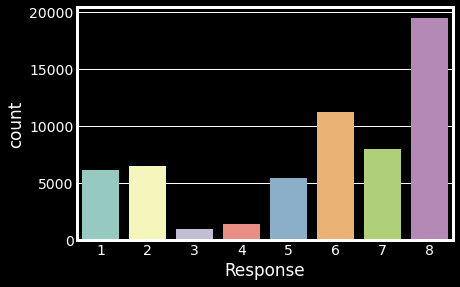

In [6]:
sns.countplot(x=insurance_df['Response']);

**Response 8 has highest values and 3 has the least**

# **Processing Target Variable**

In [7]:
#Combining the Categores to 3 categories
insurance_df['Modified_Response']  = insurance_df['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))

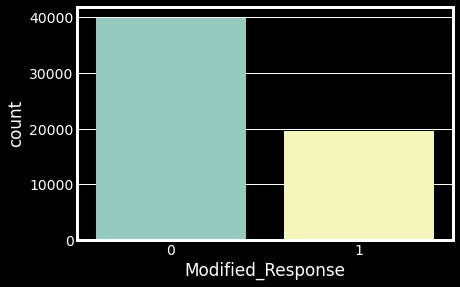

In [8]:
sns.countplot(x= insurance_df['Modified_Response']);

> **Still some imbalance can be seen**

# **Removing old target variable**

In [9]:
# Dropping old response columns
insurance_df.drop('Response',axis = 1, inplace=True)

# **Making categorical and numerical columns list**

In [10]:
# Making lists with categorical and numerical features.
categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype =='object']

numerical = categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype !='object']

# **Visualizations On Categorical Features**

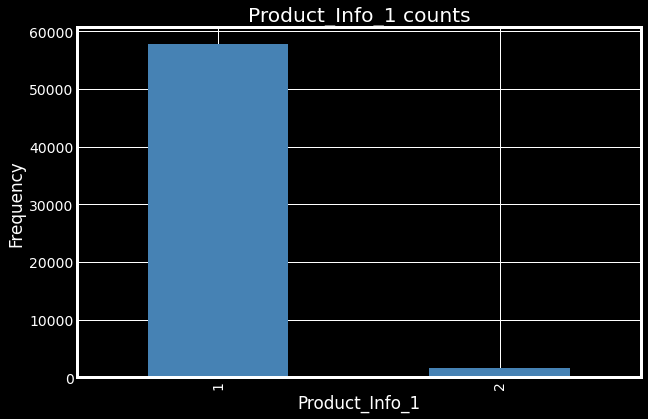

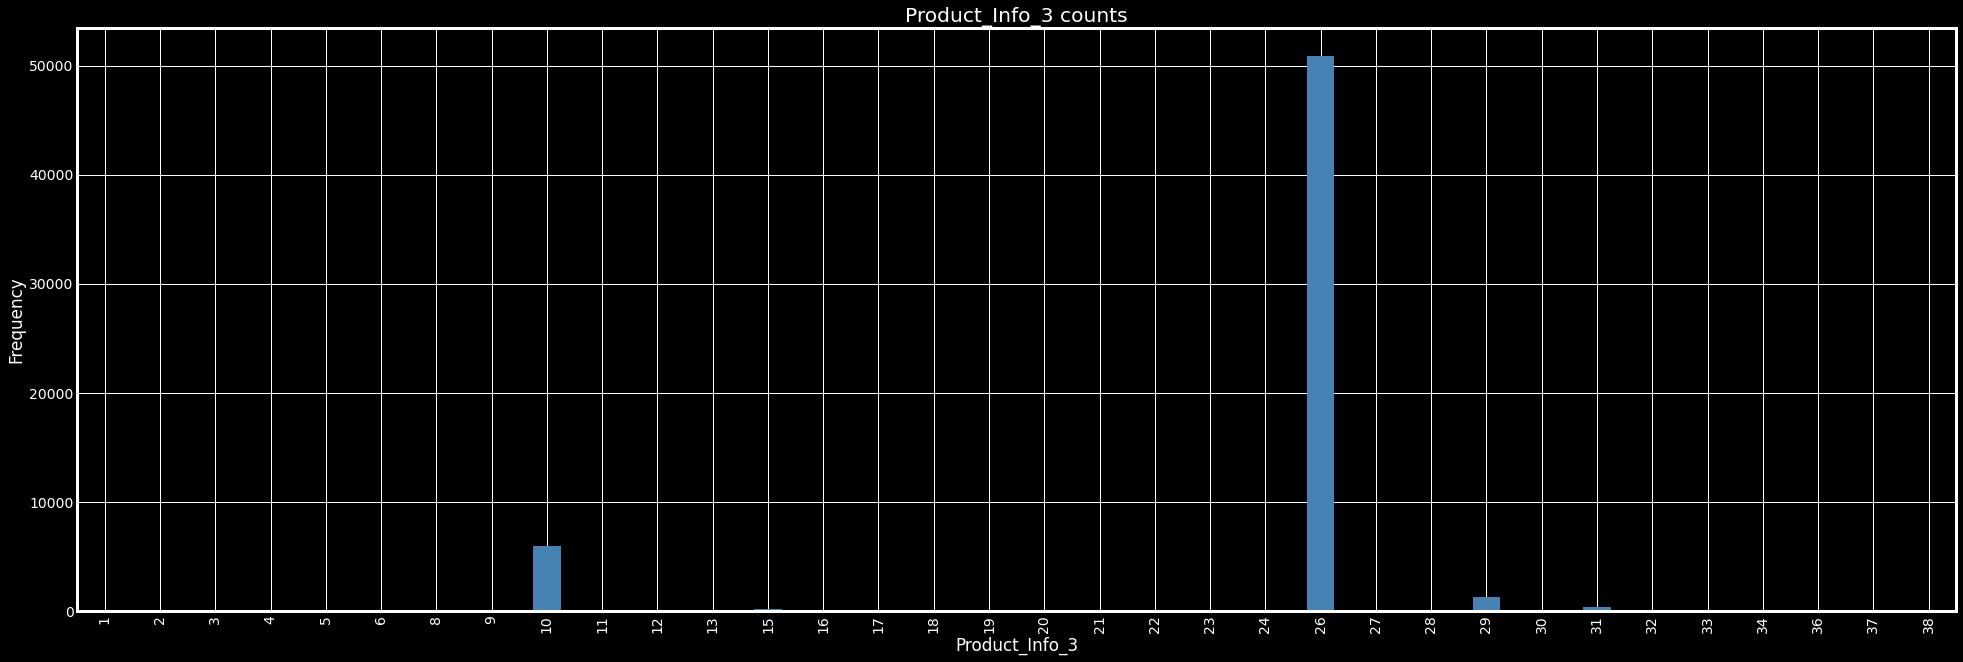

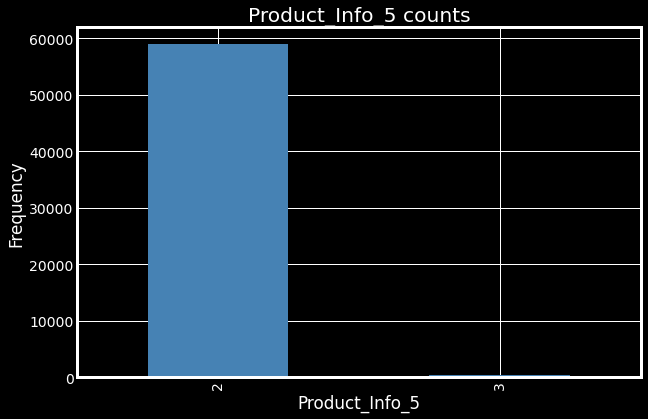

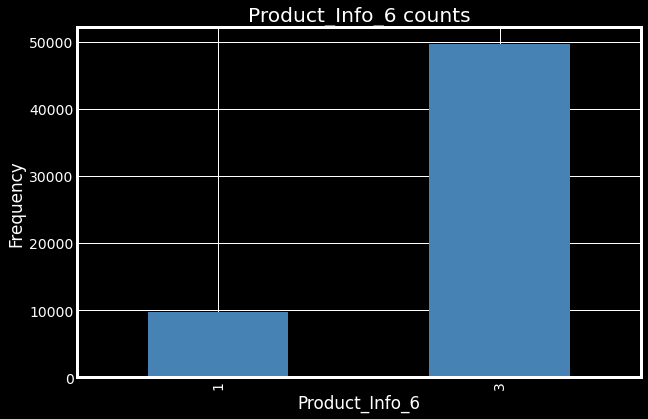

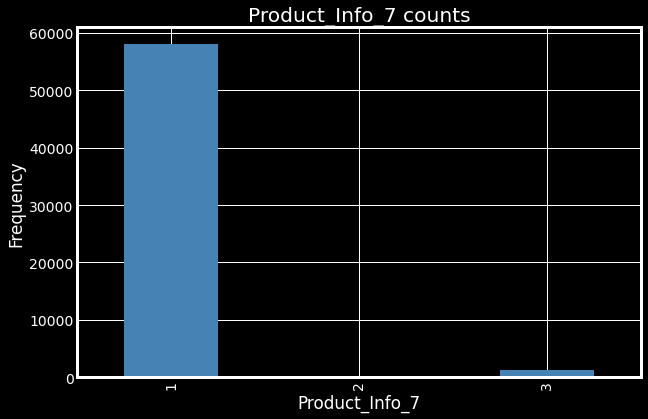

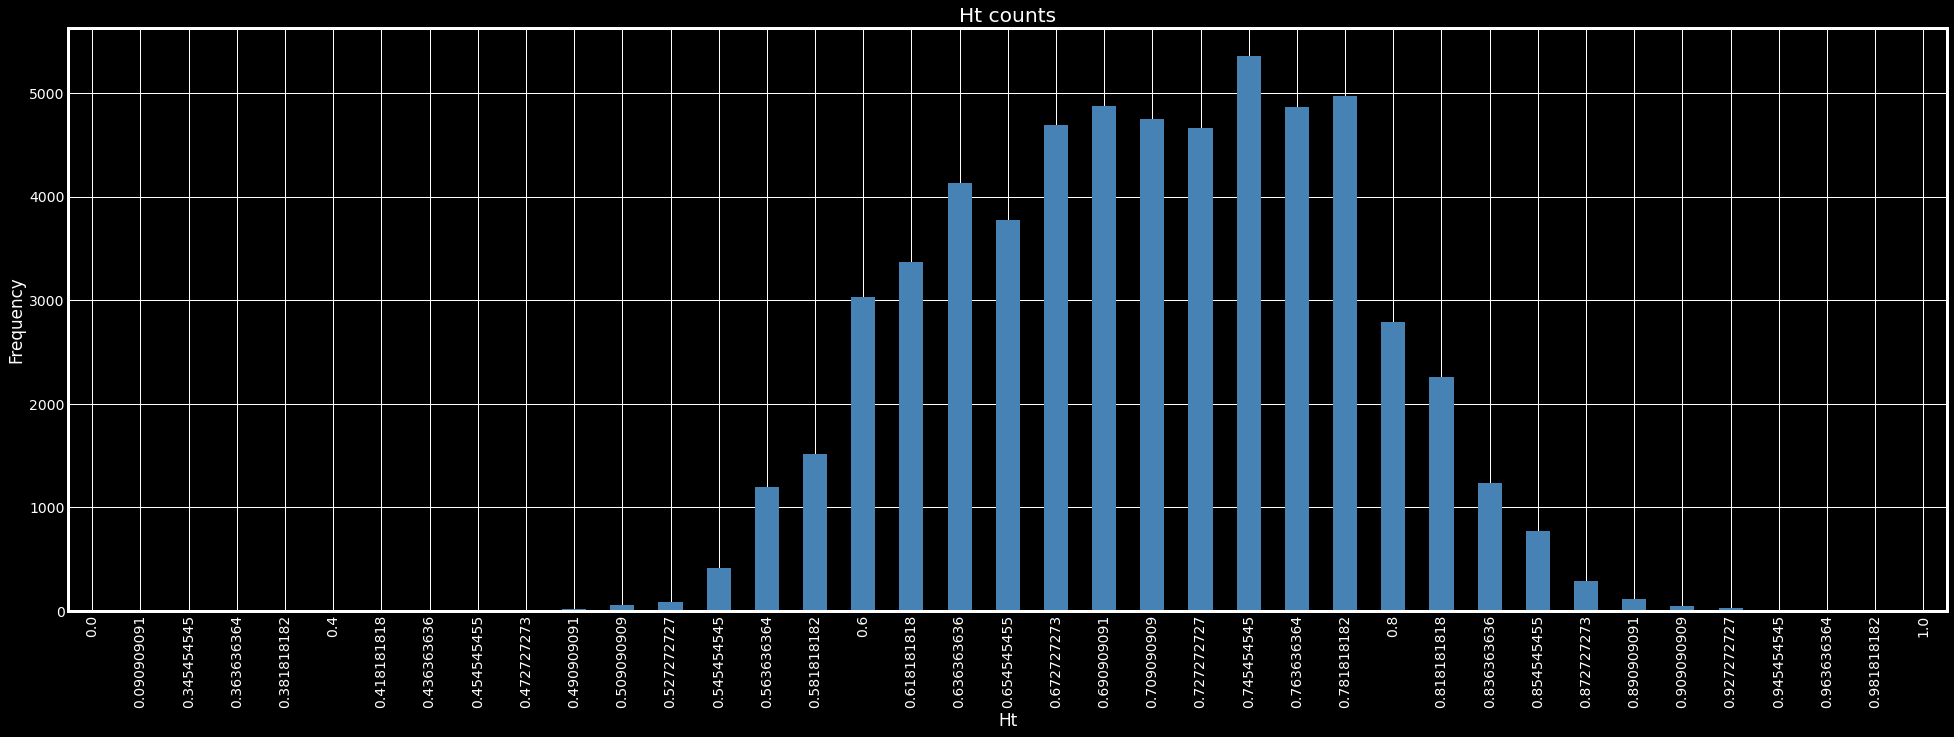

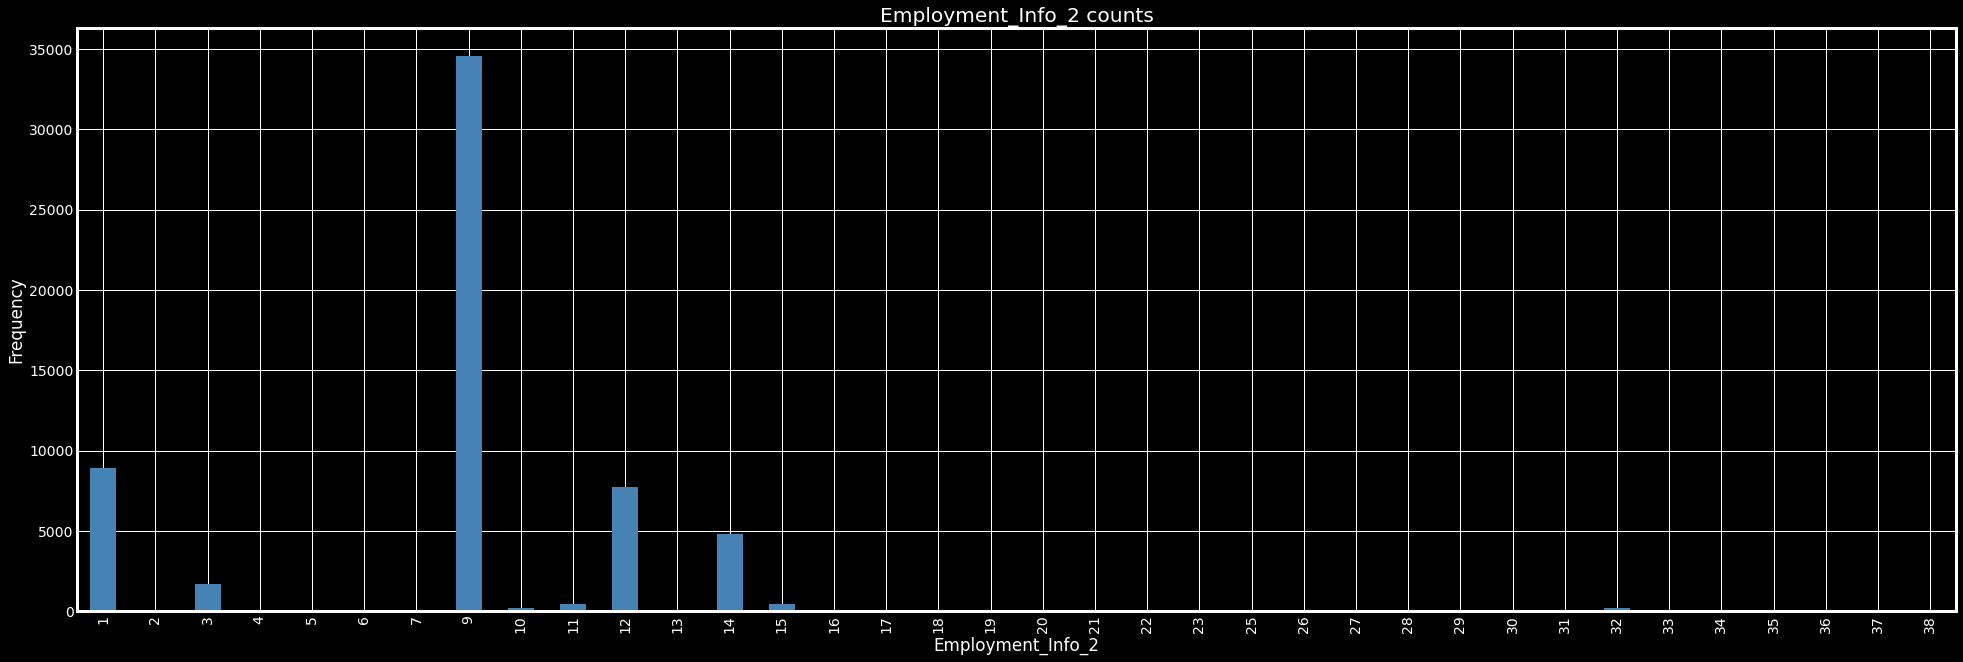

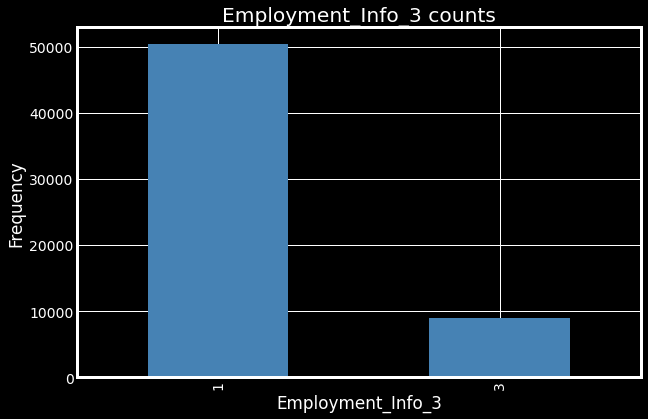

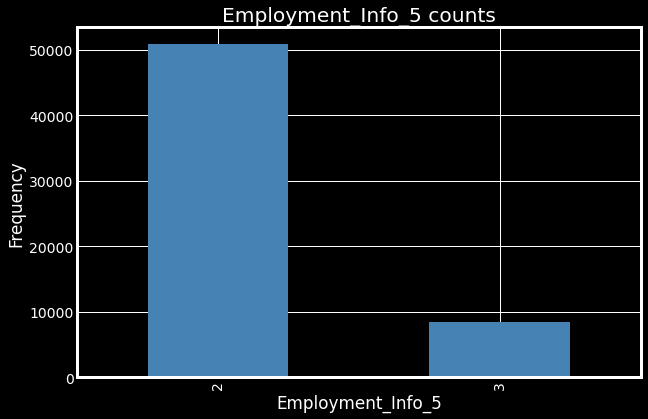

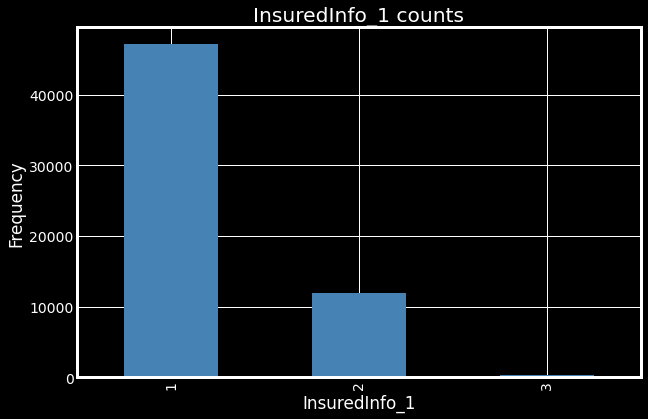

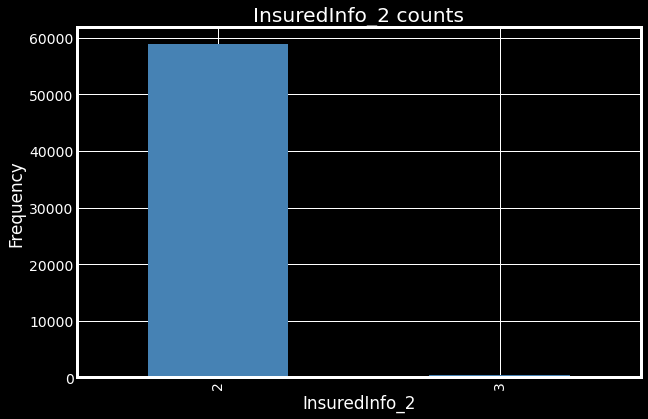

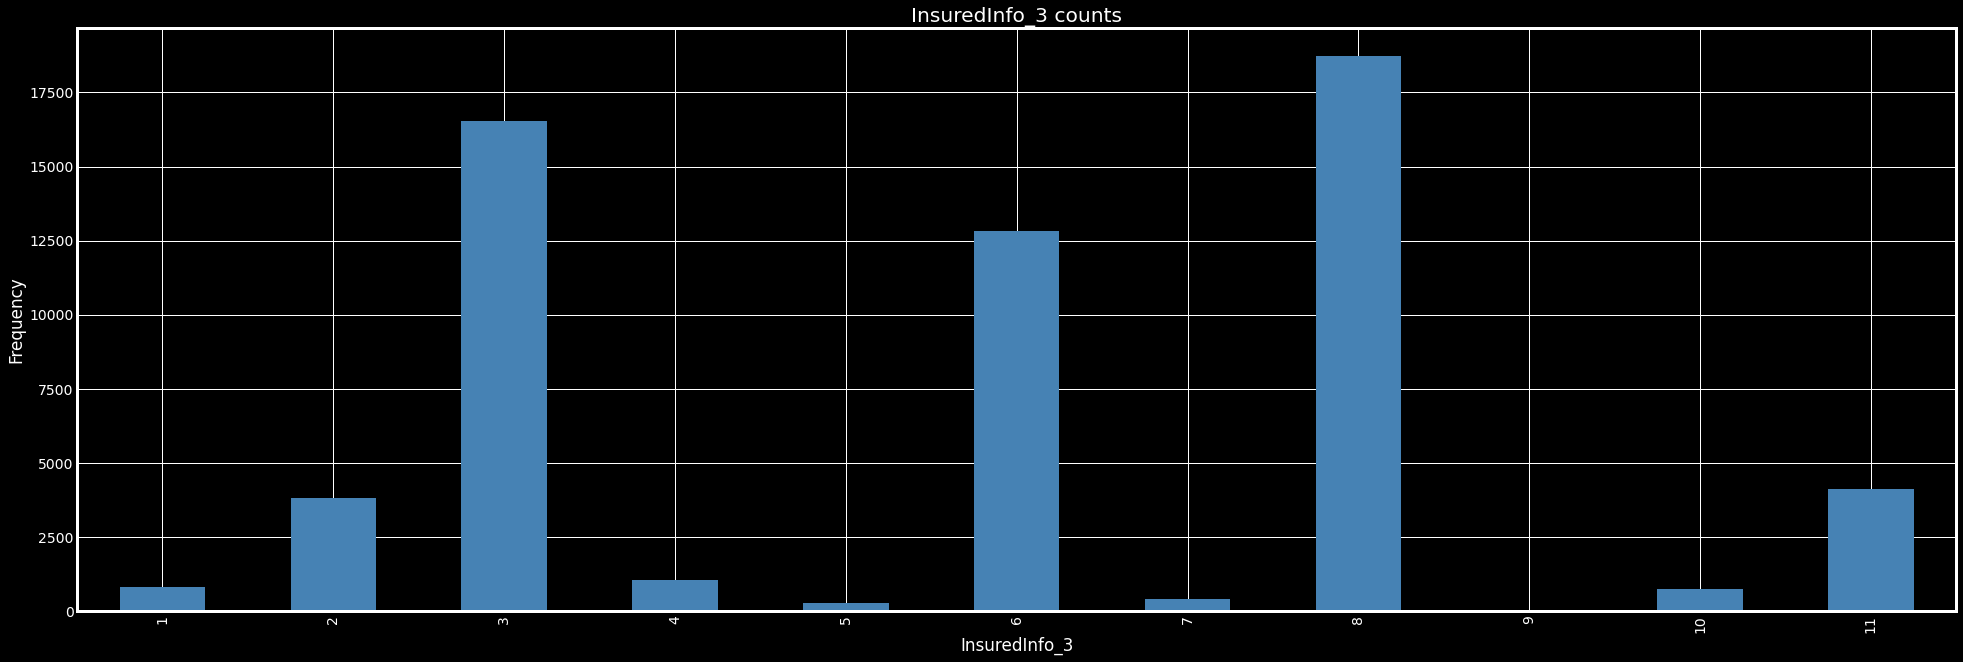

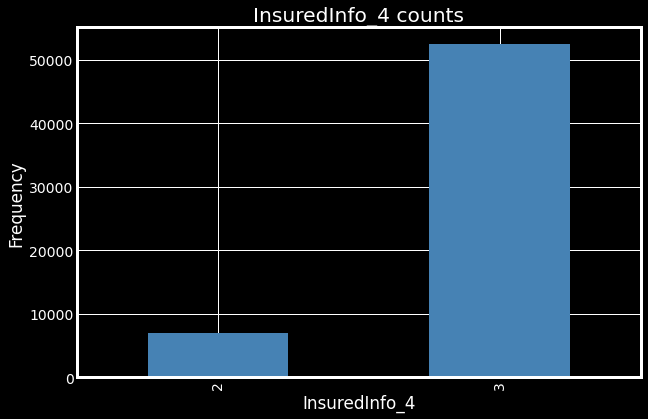

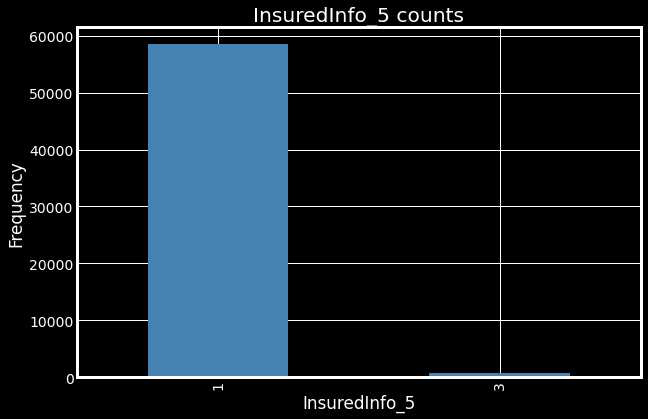

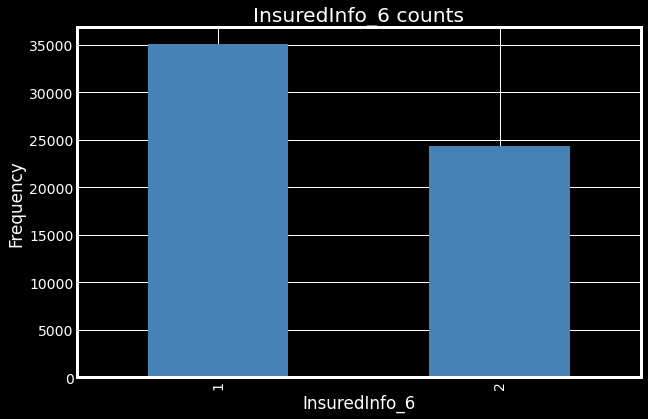

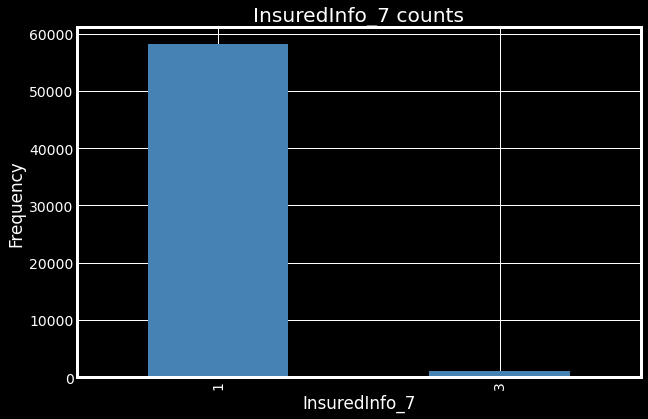

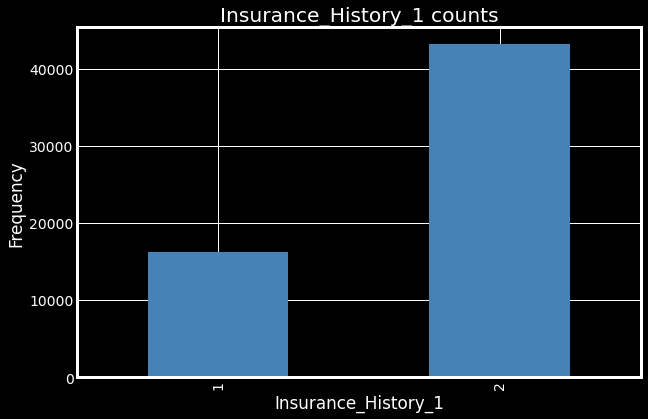

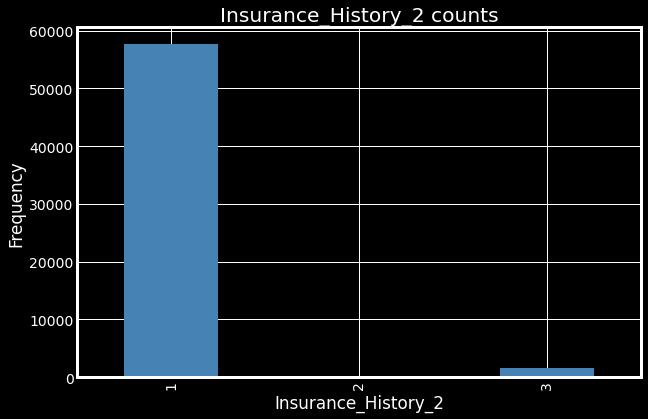

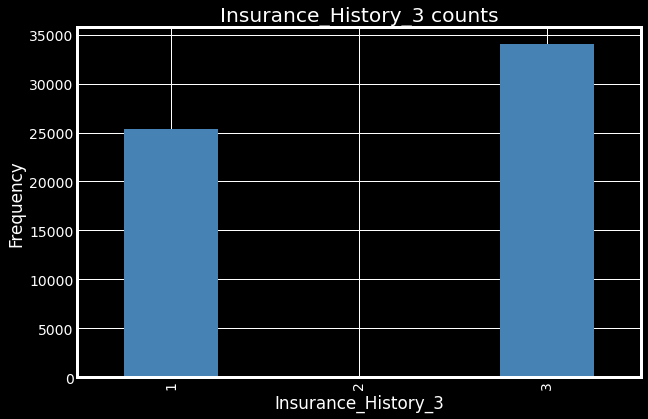

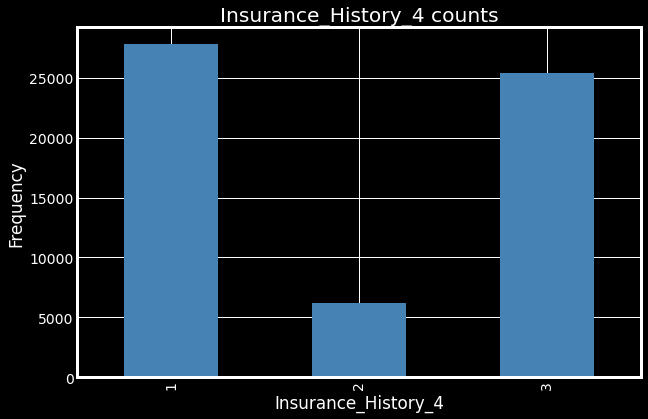

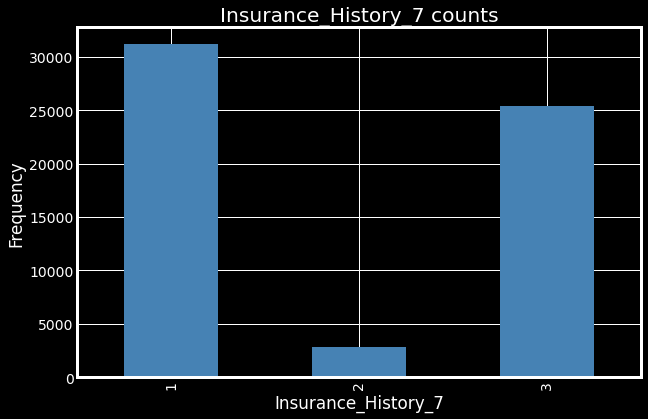

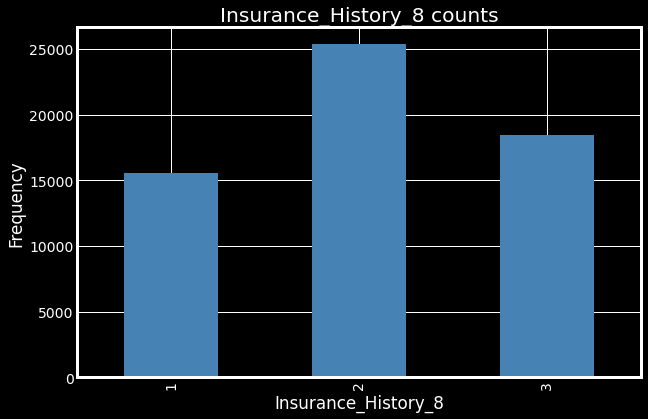

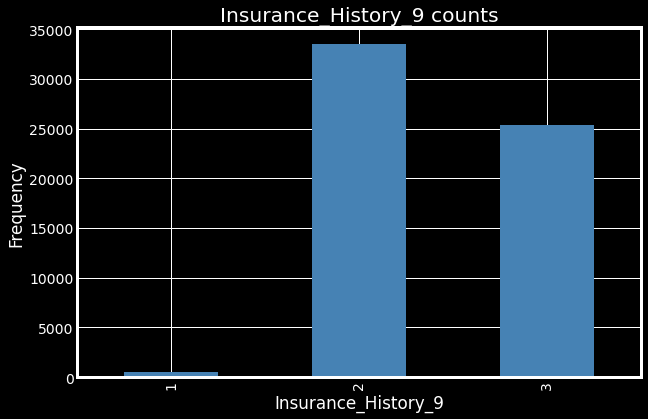

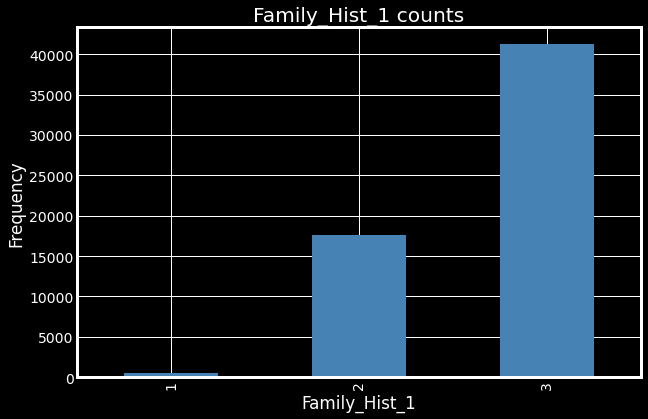

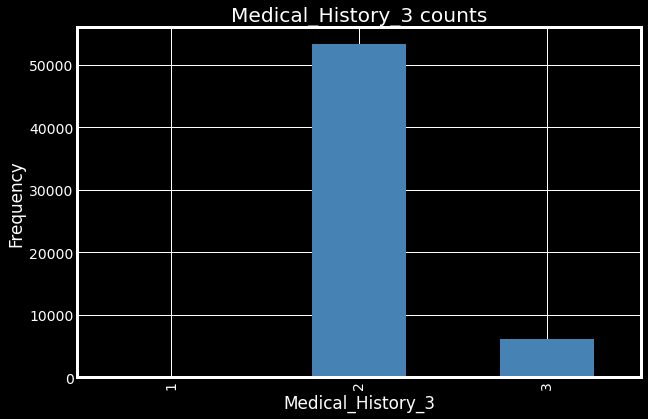

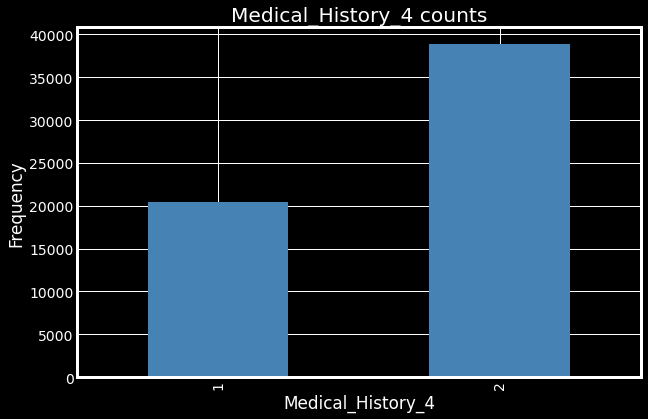

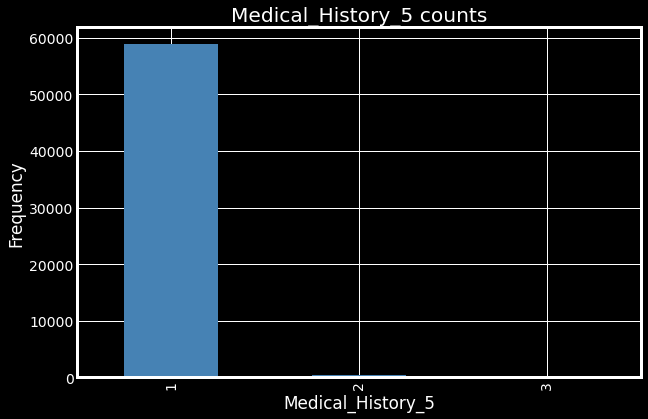

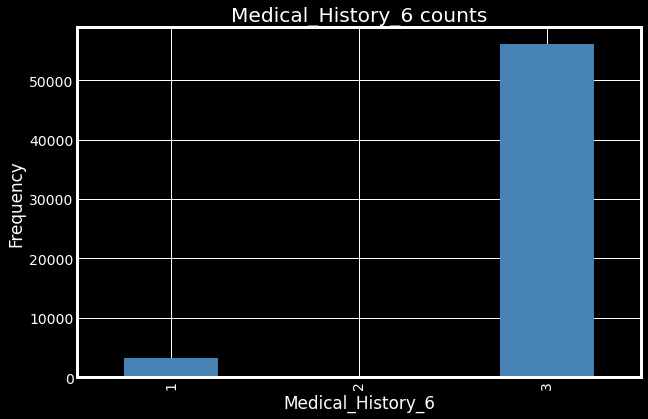

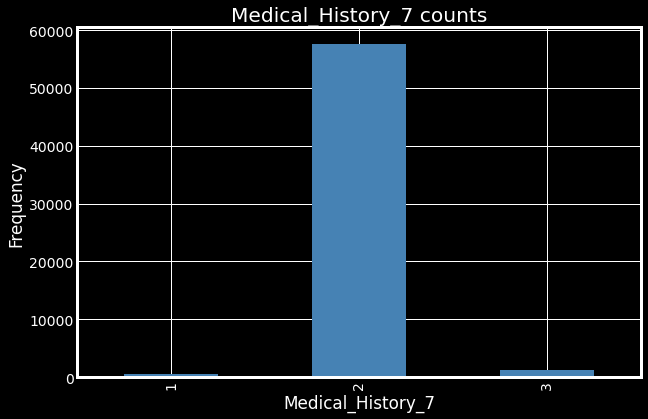

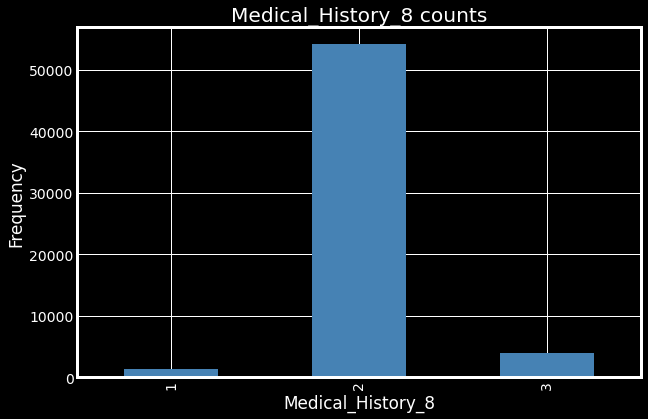

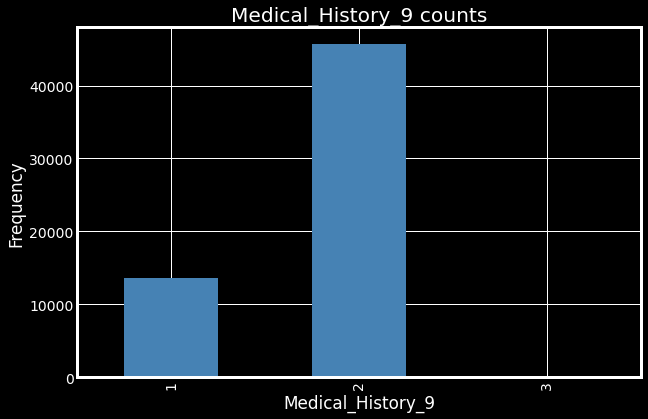

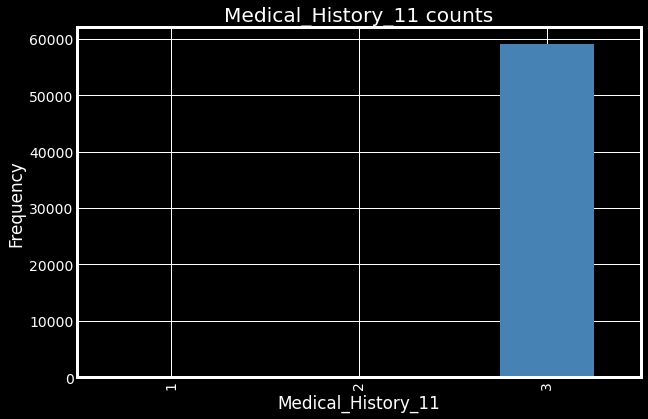

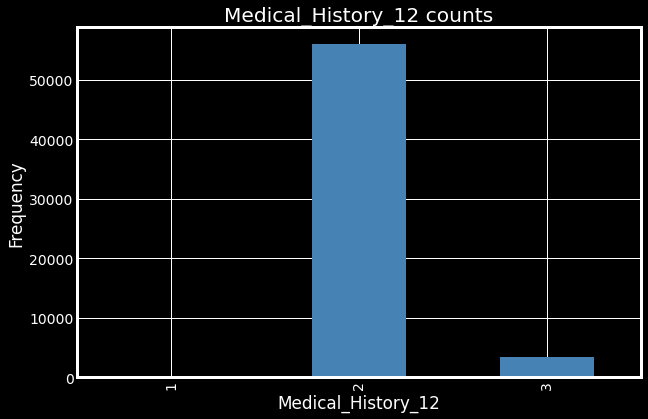

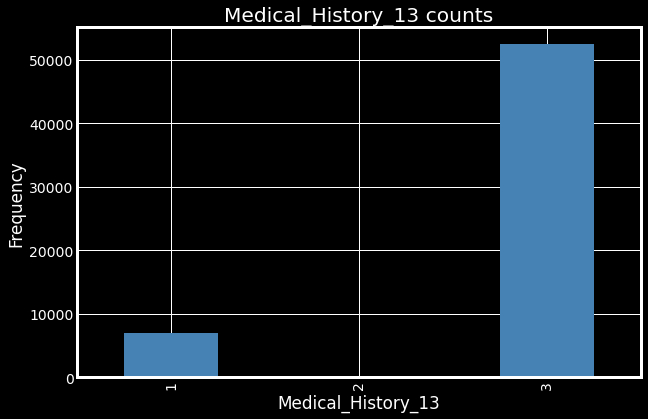

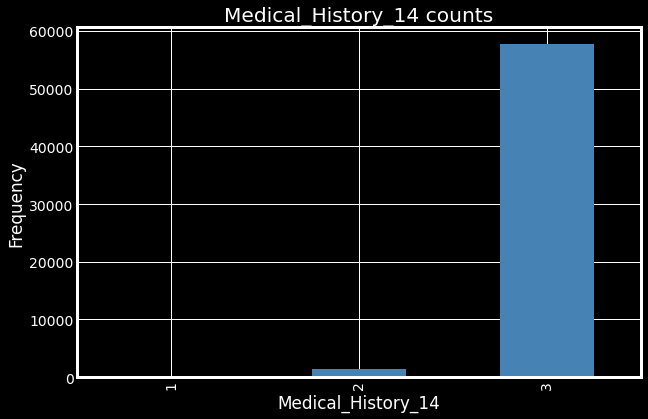

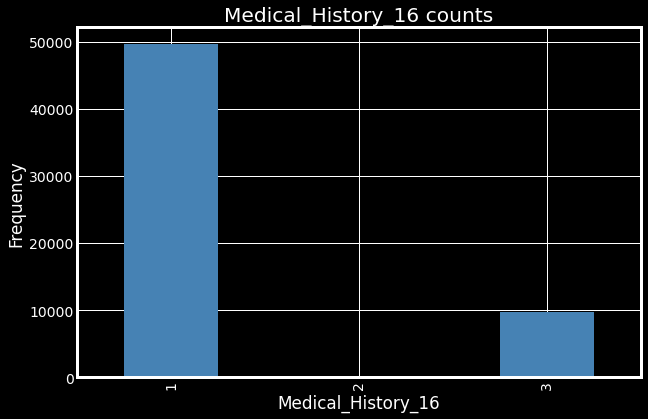

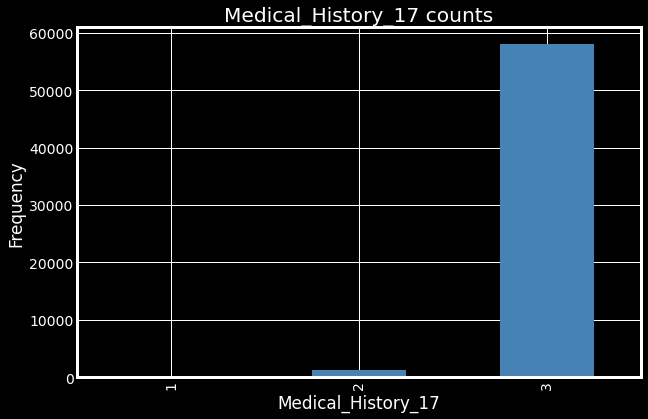

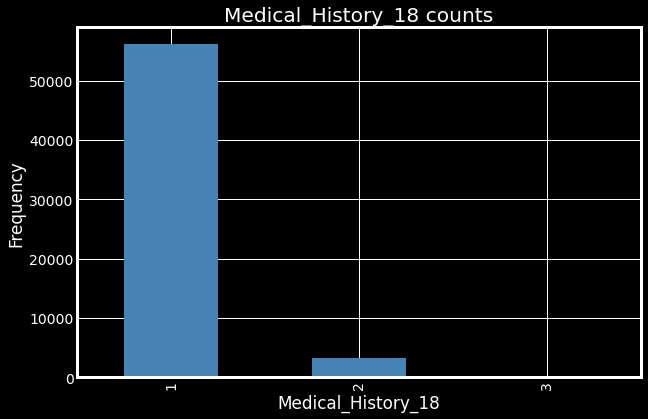

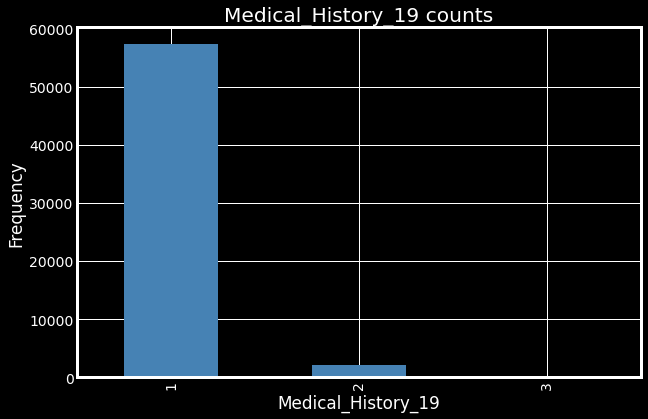

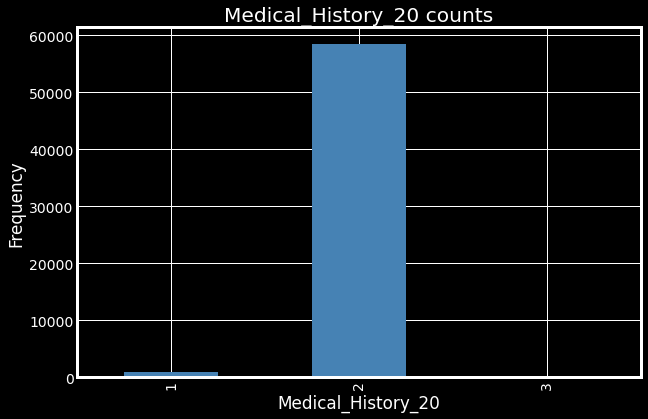

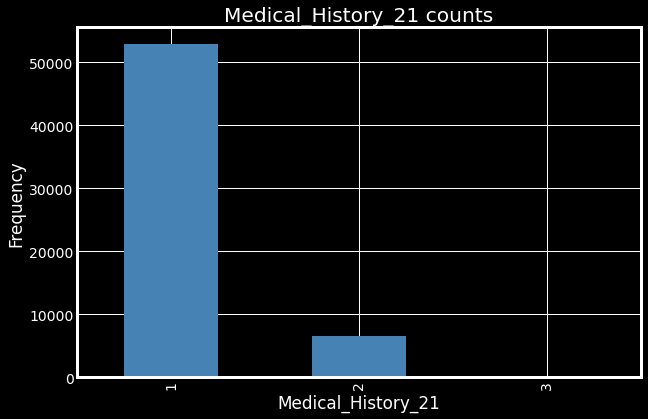

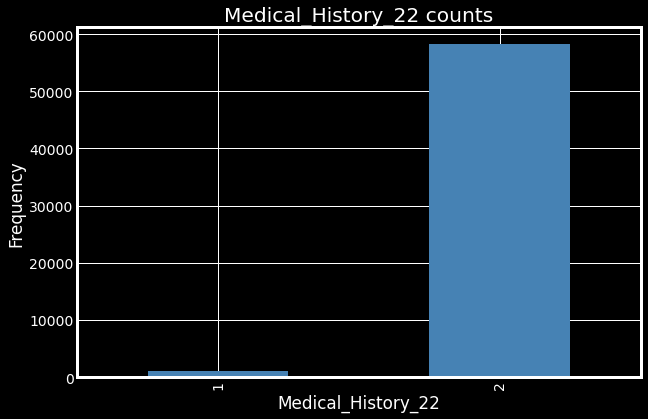

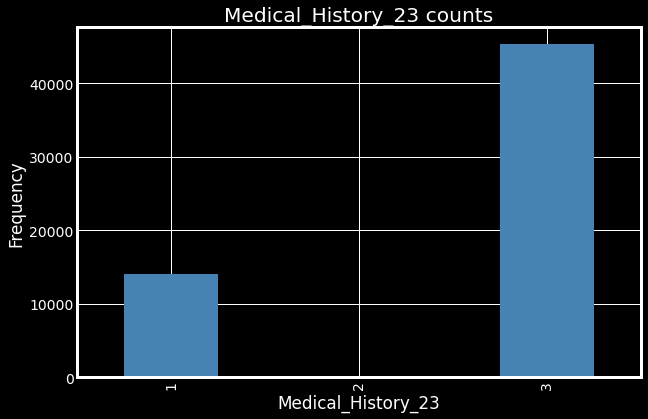

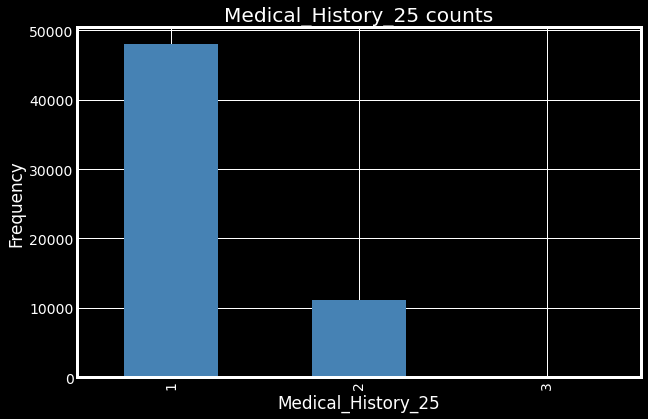

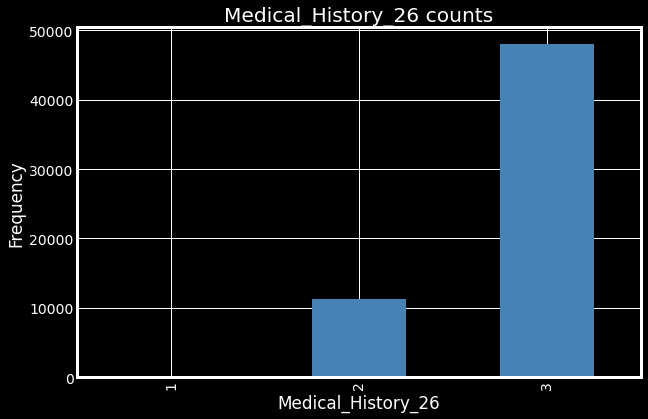

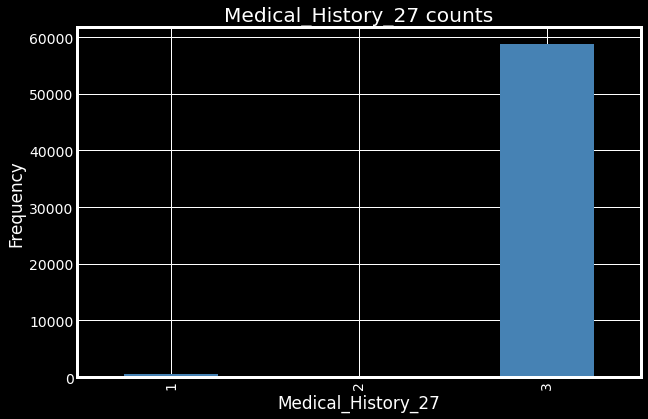

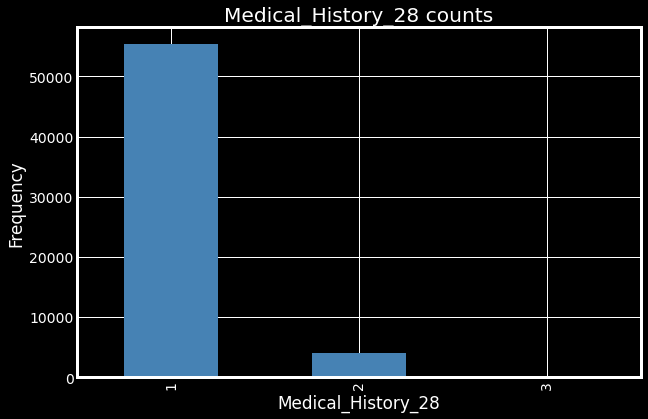

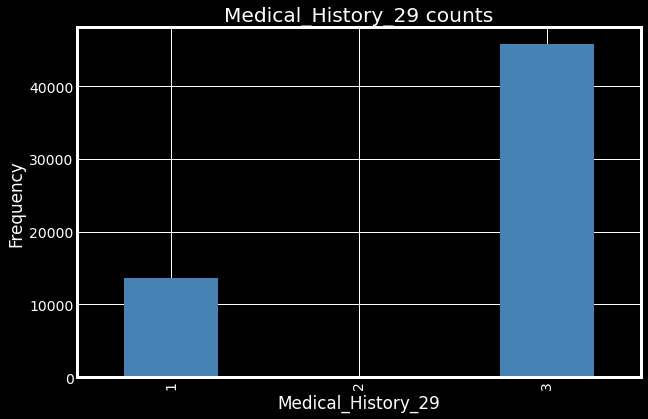

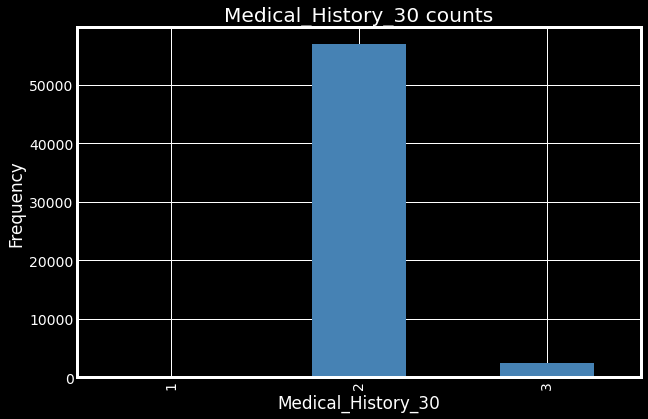

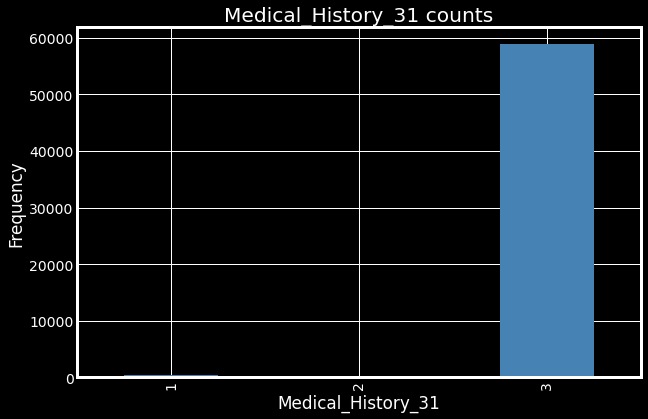

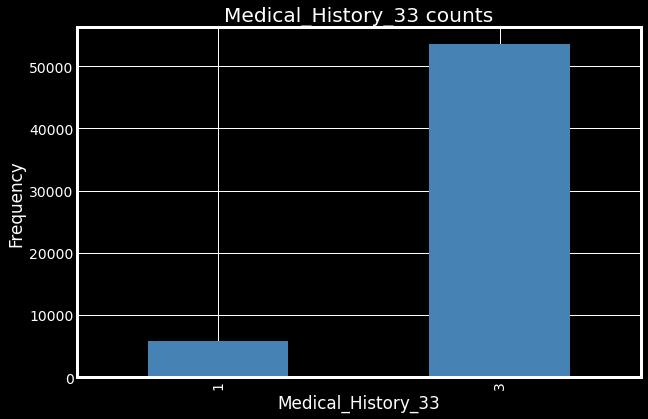

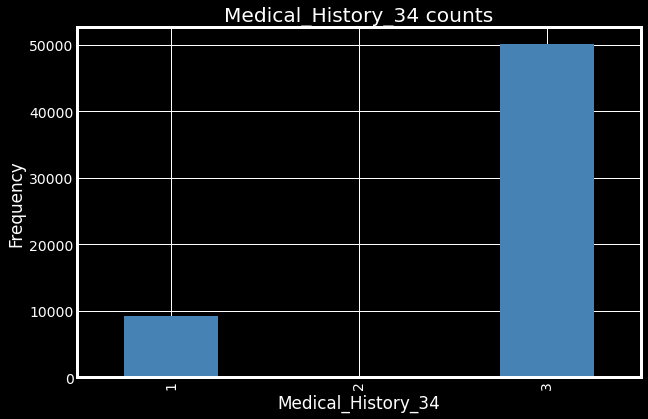

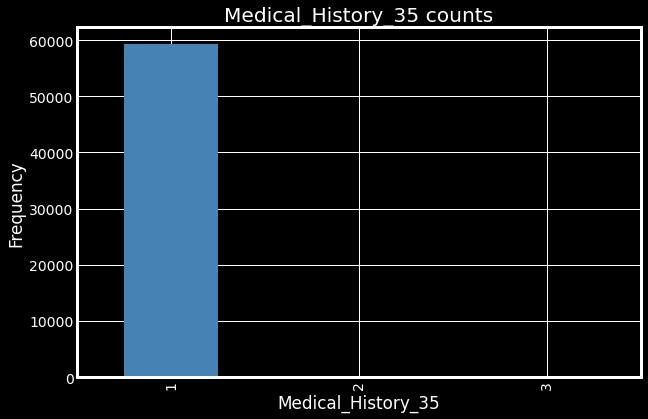

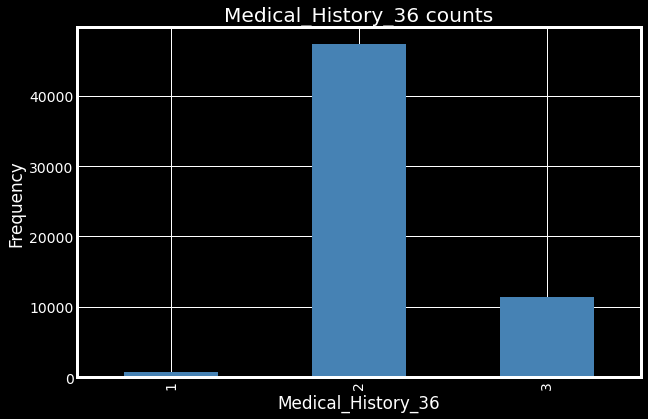

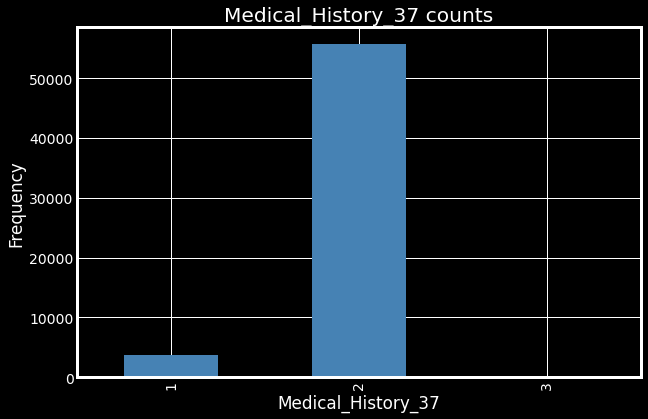

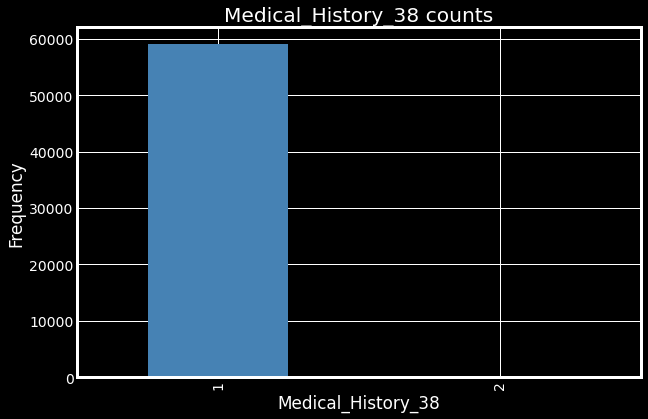

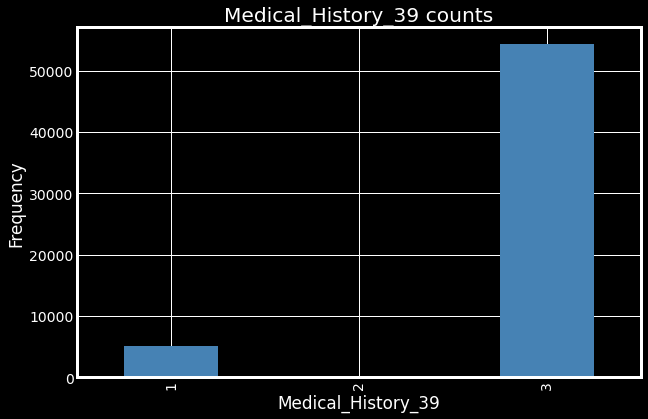

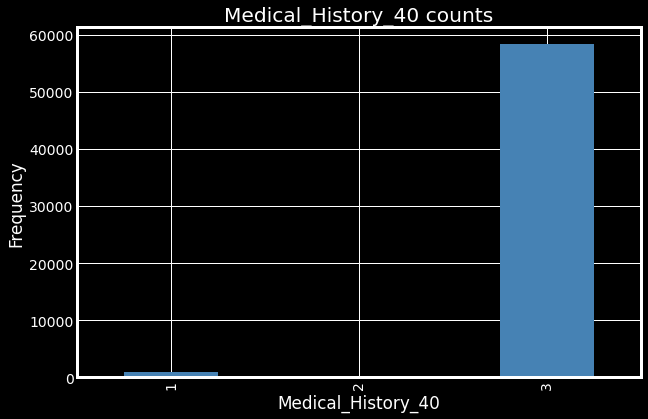

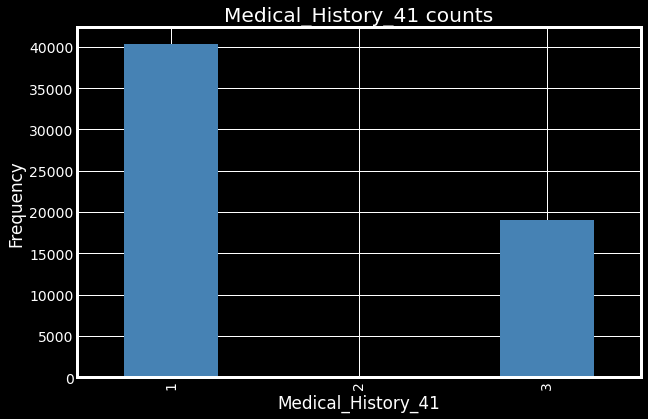

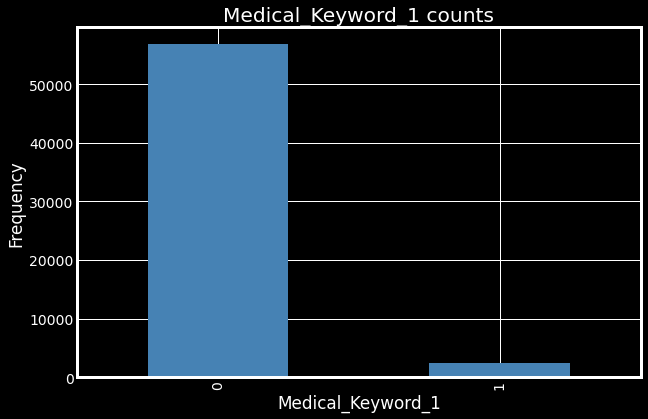

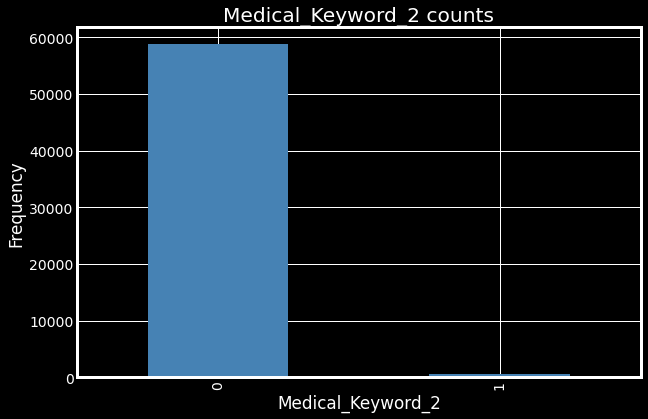

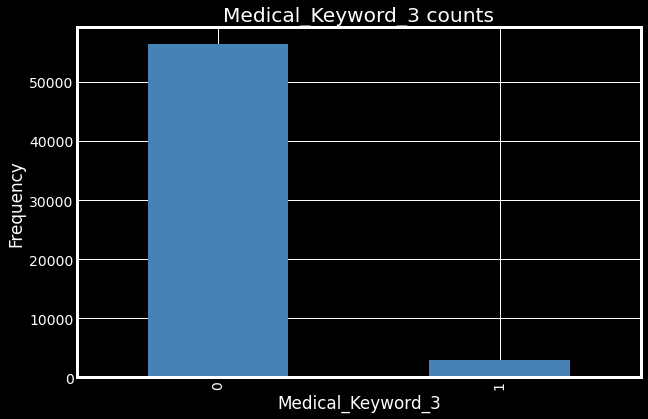

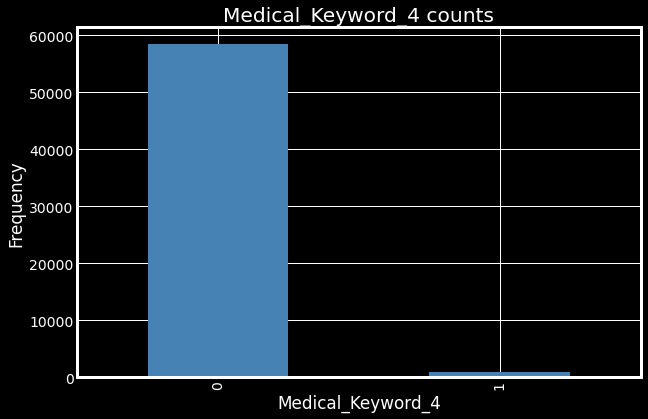

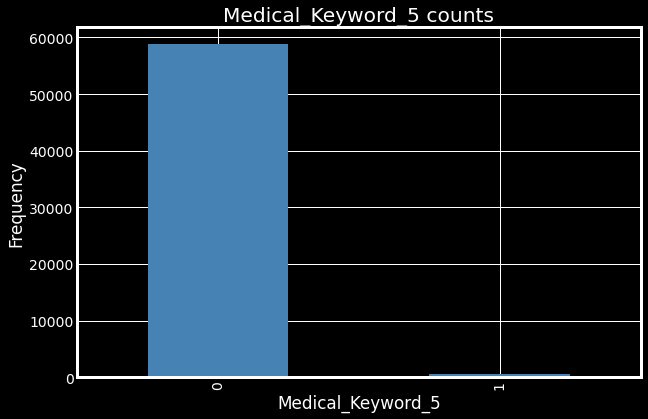

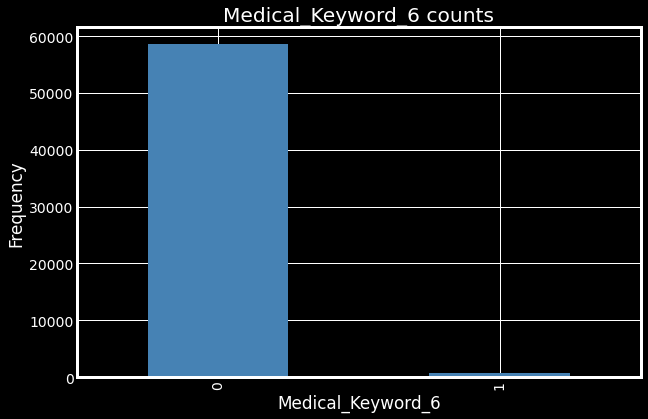

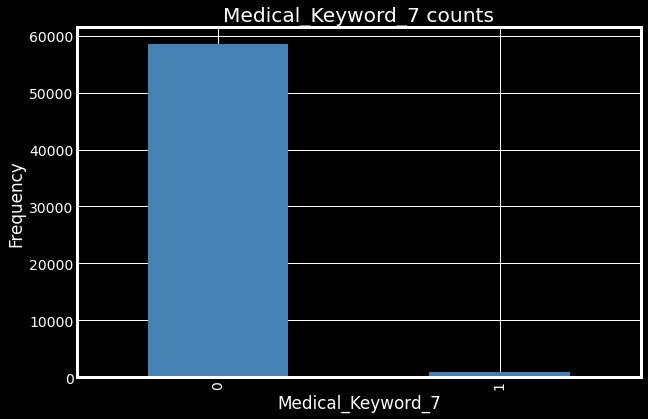

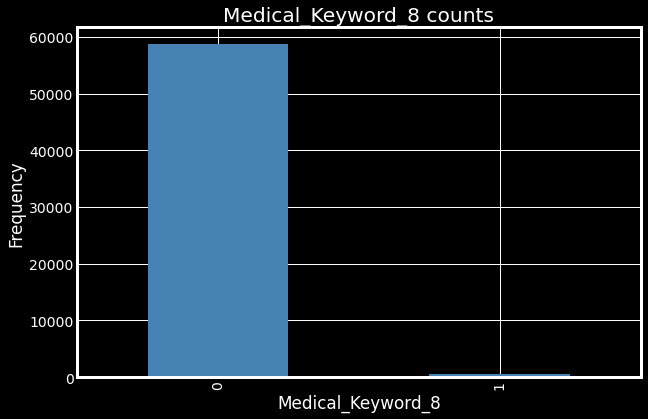

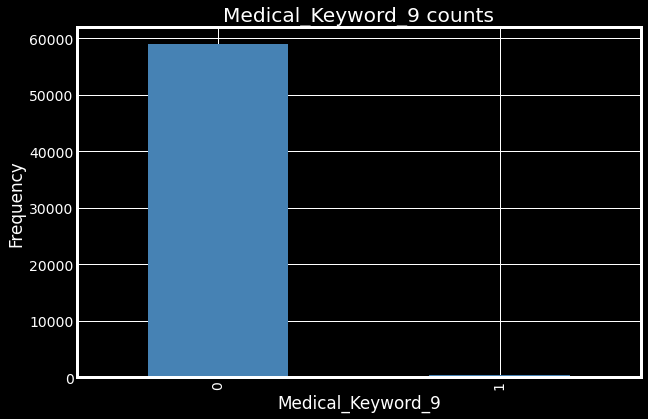

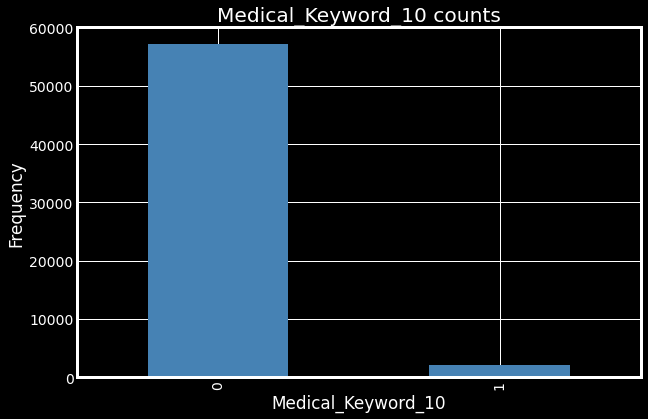

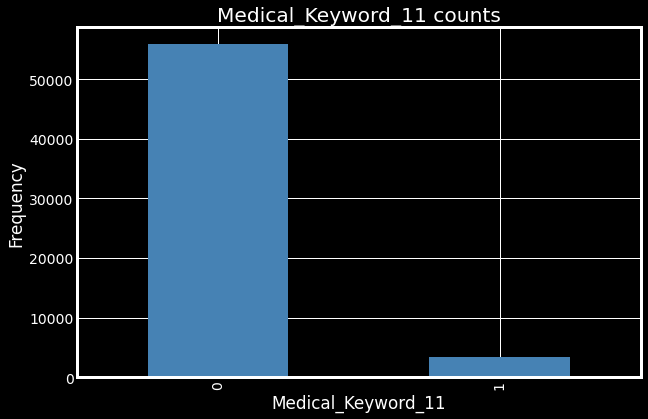

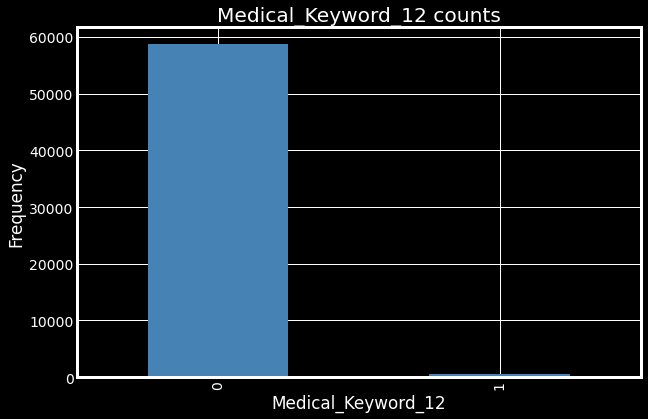

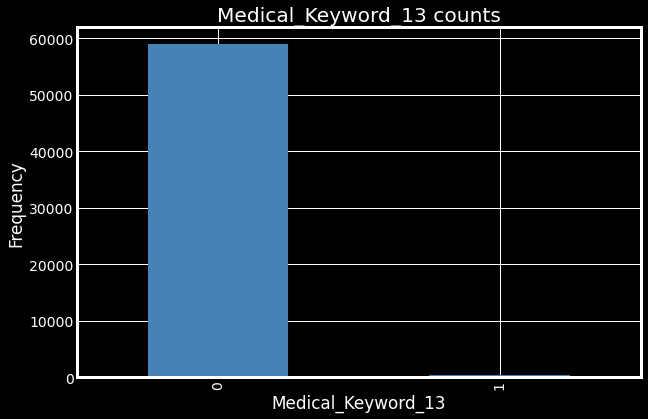

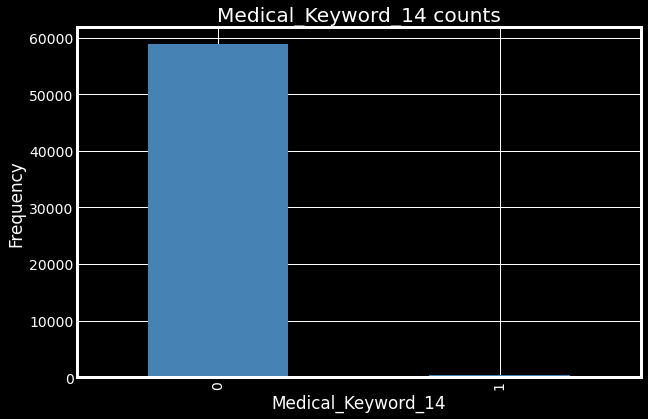

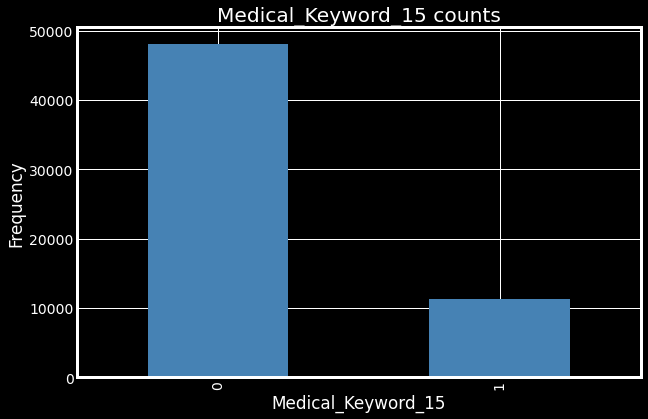

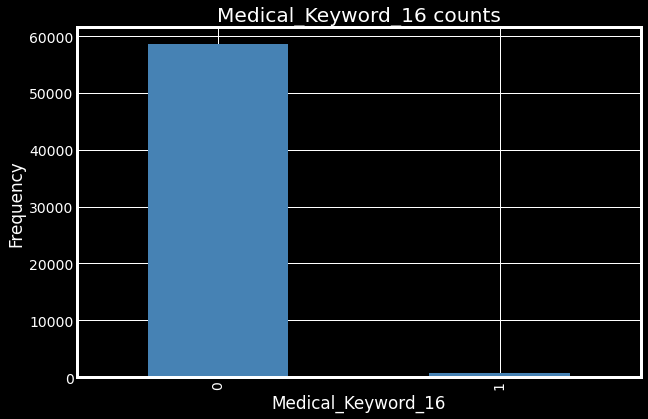

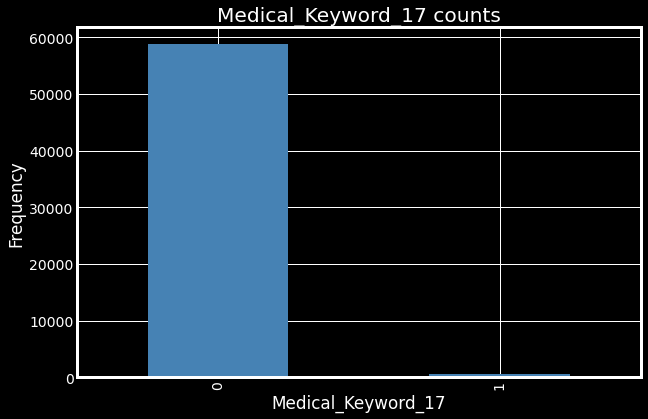

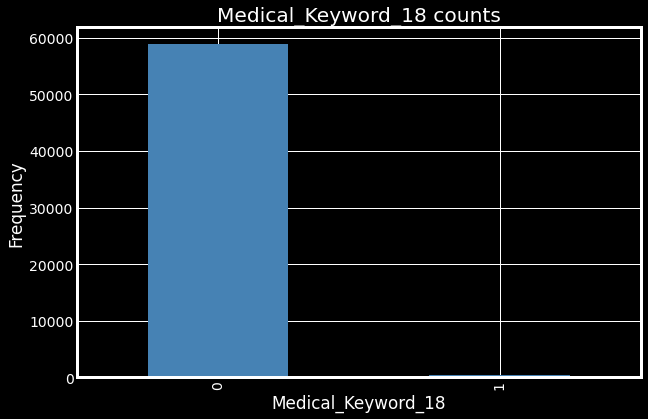

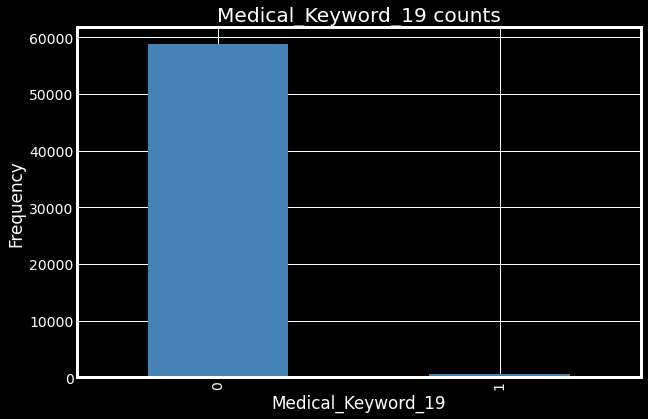

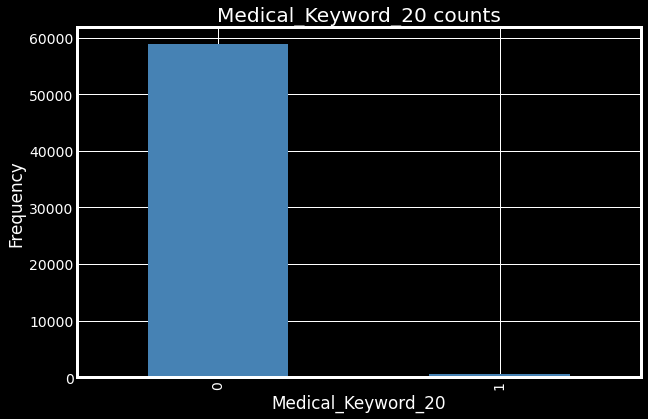

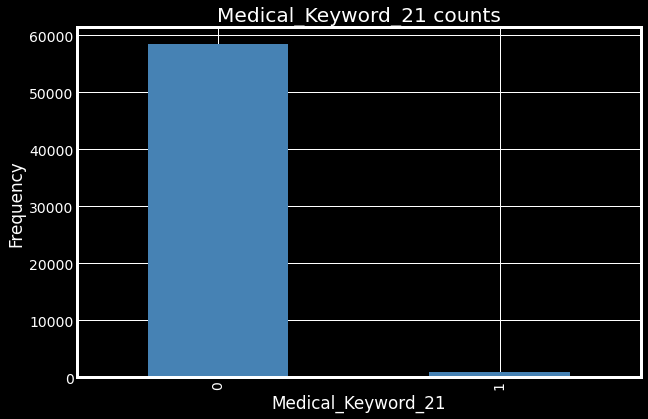

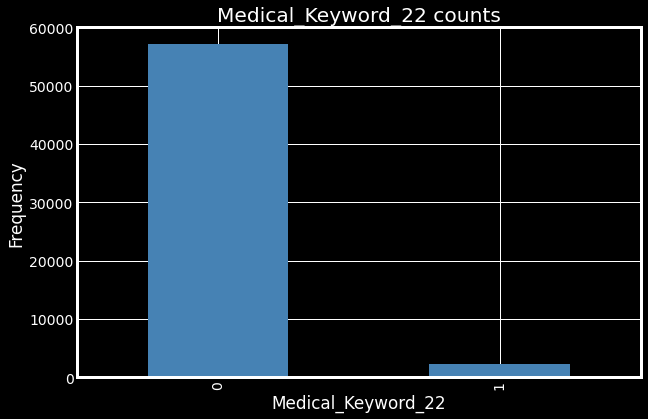

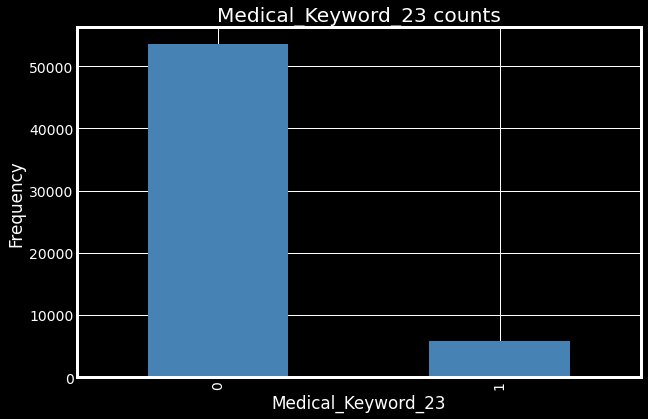

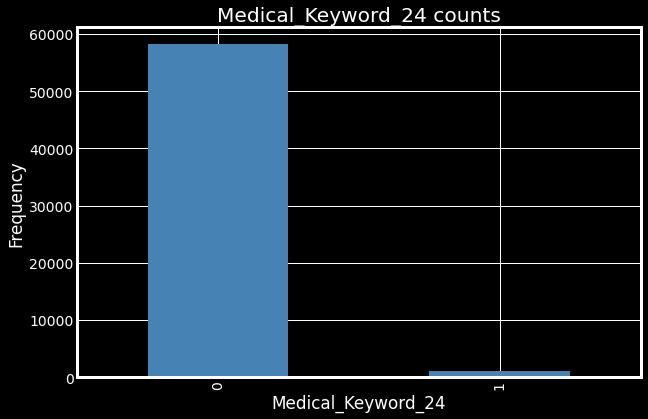

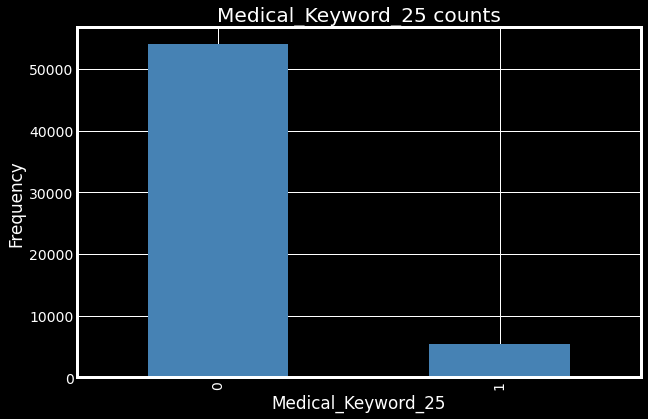

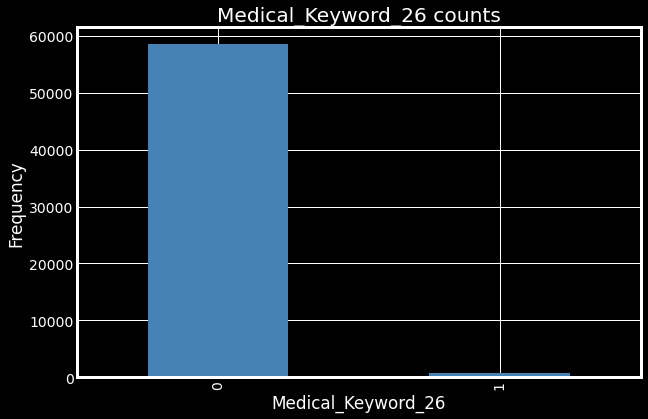

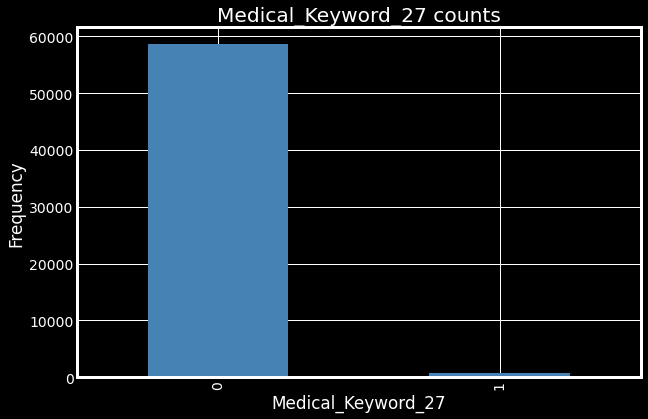

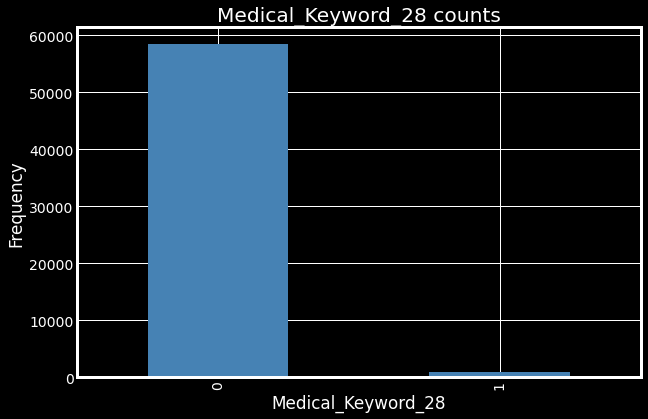

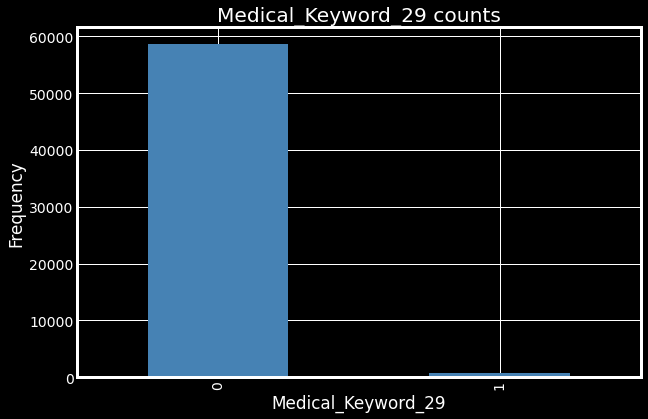

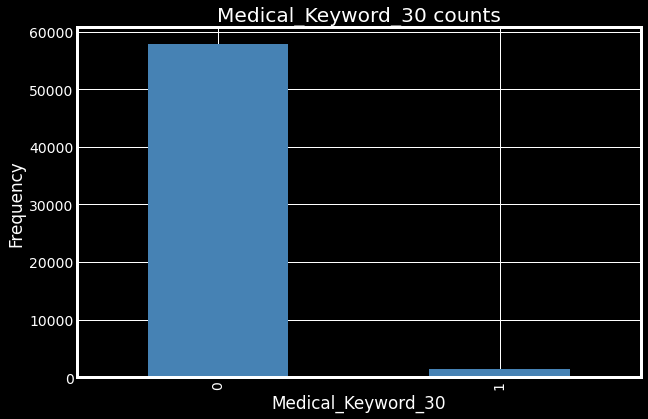

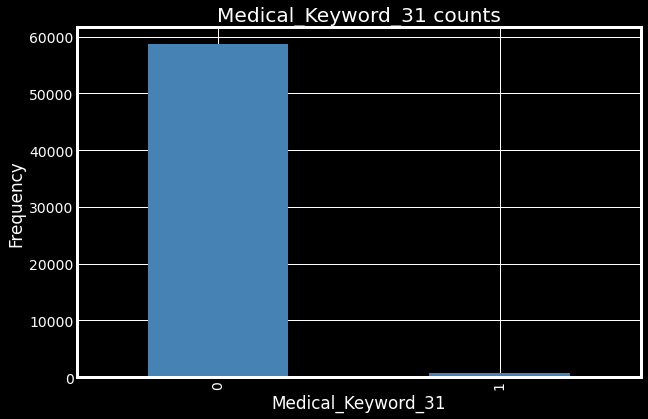

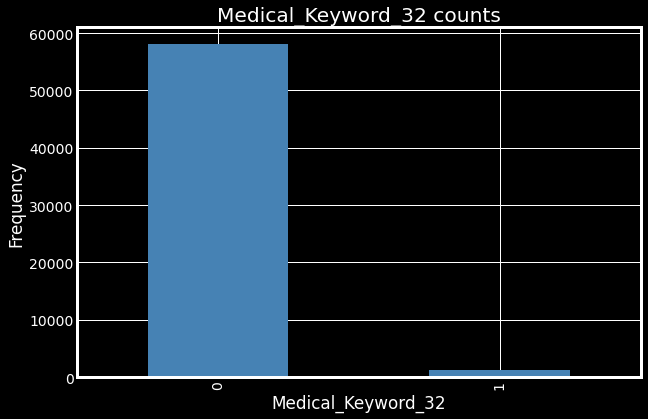

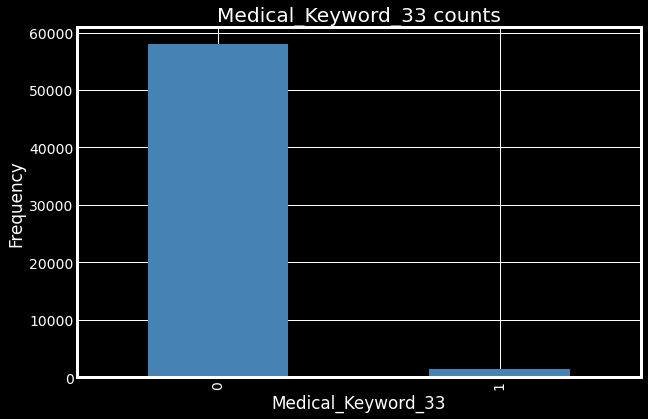

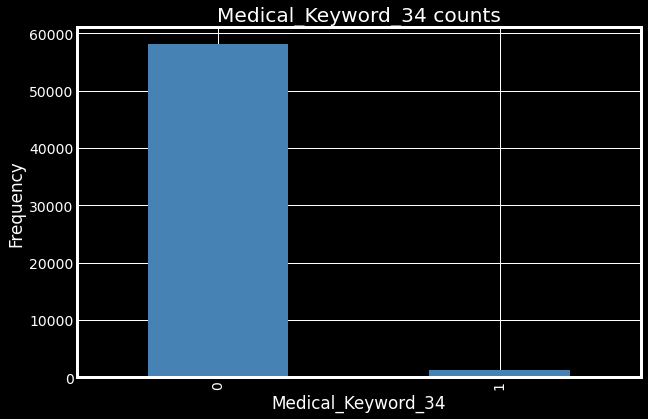

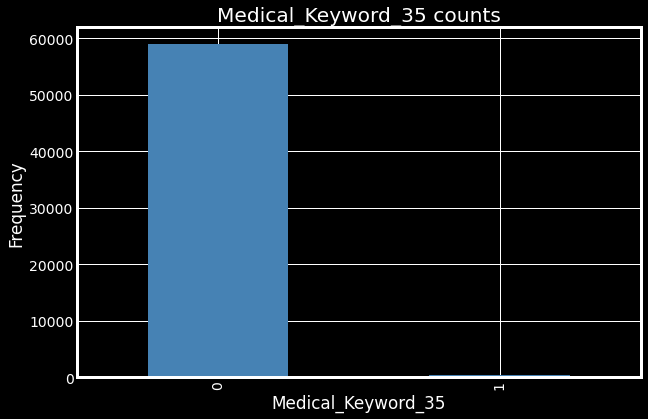

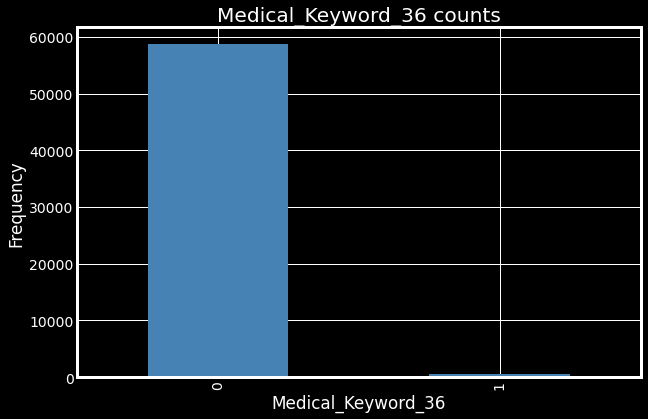

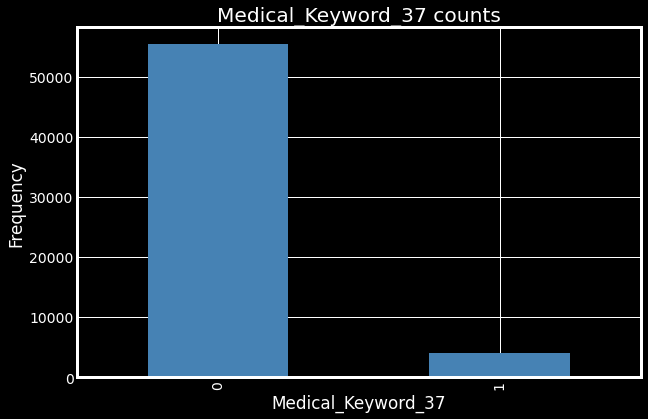

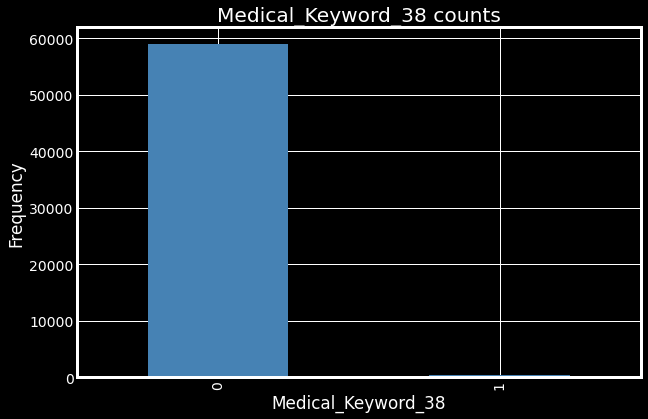

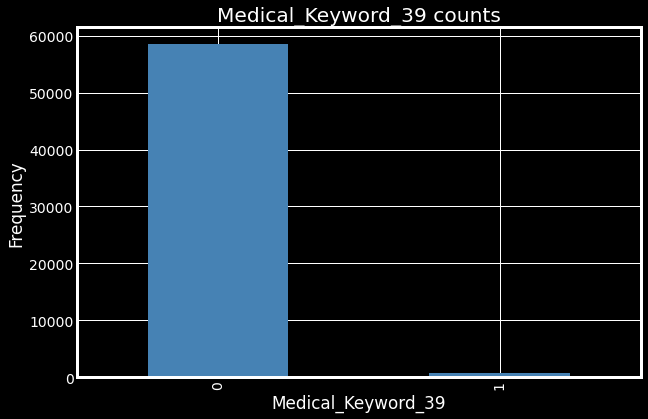

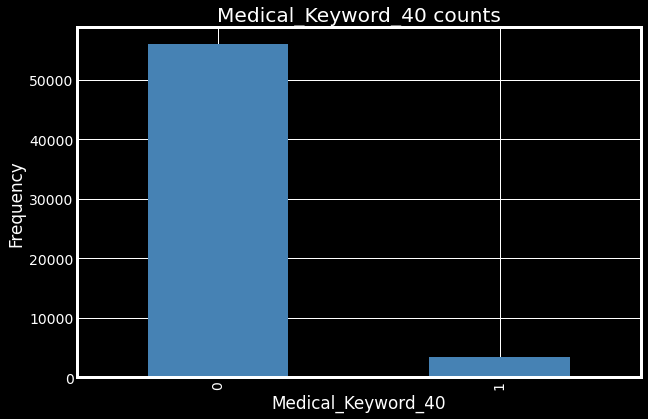

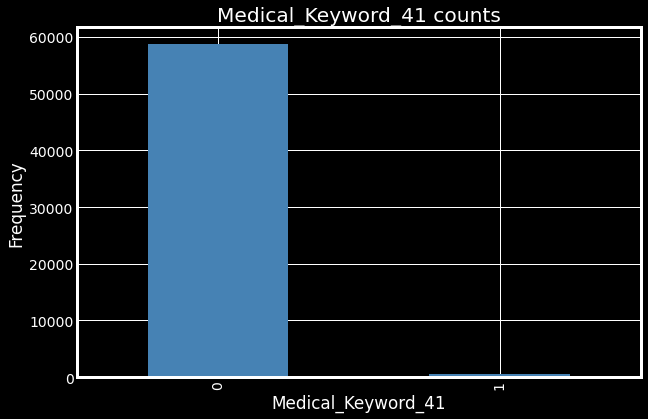

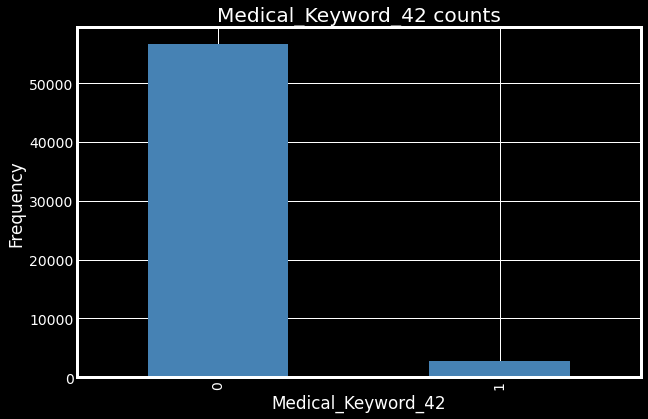

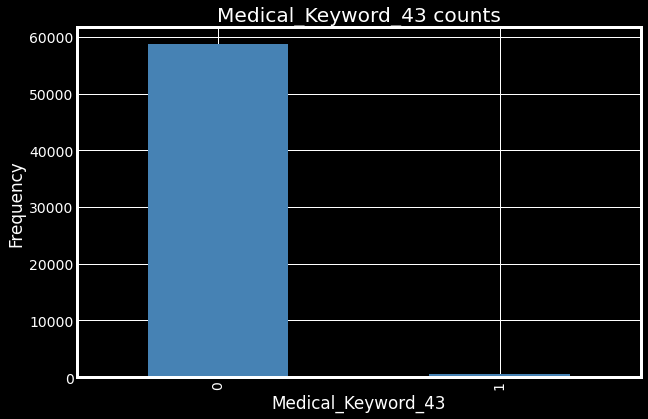

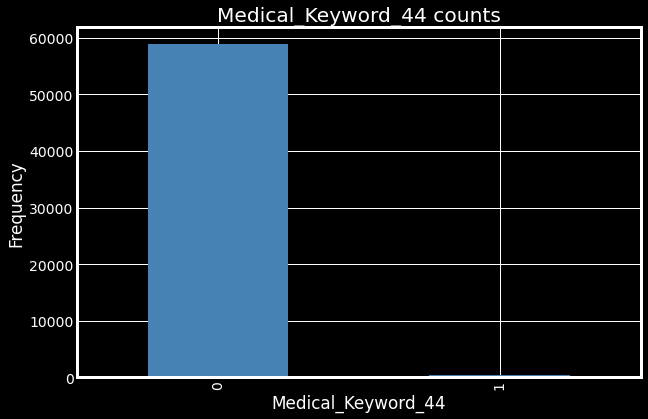

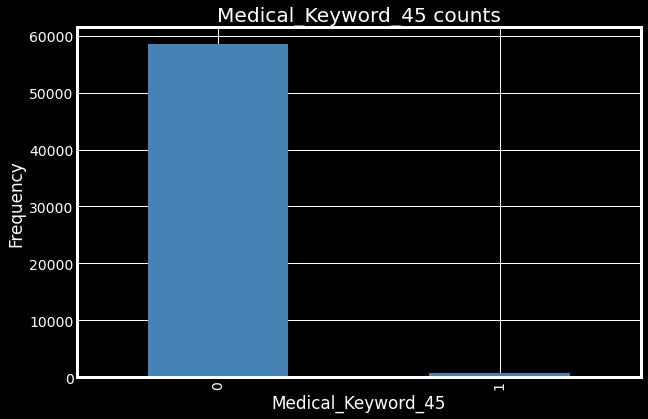

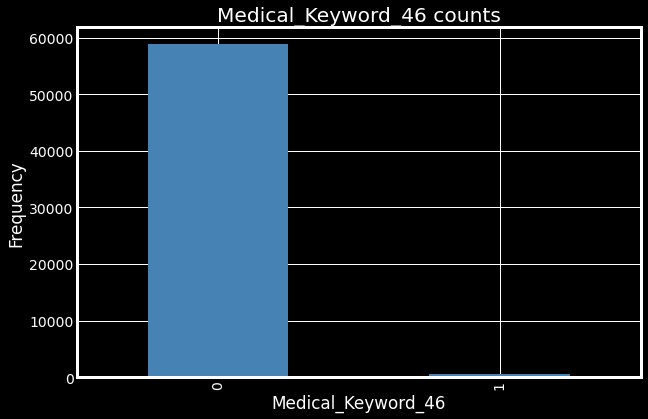

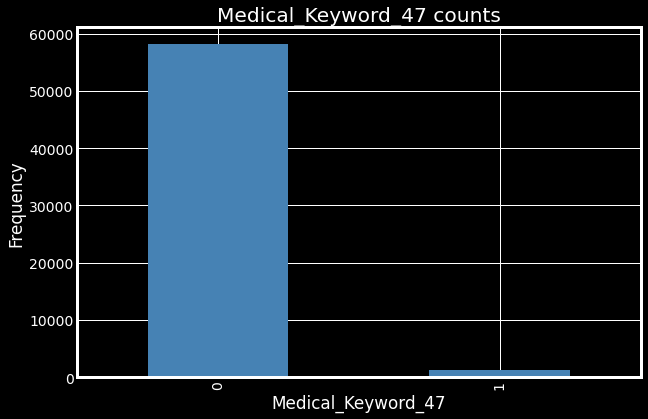

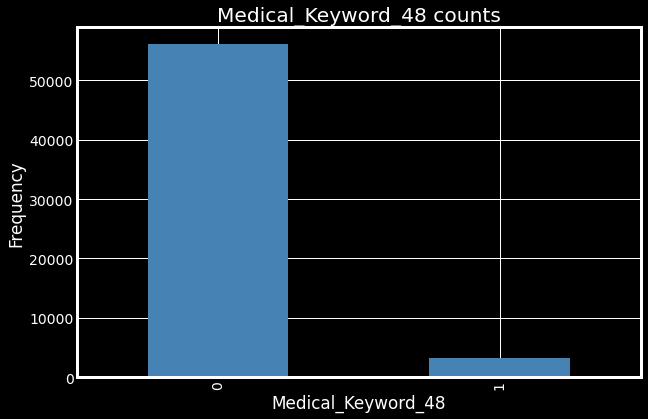

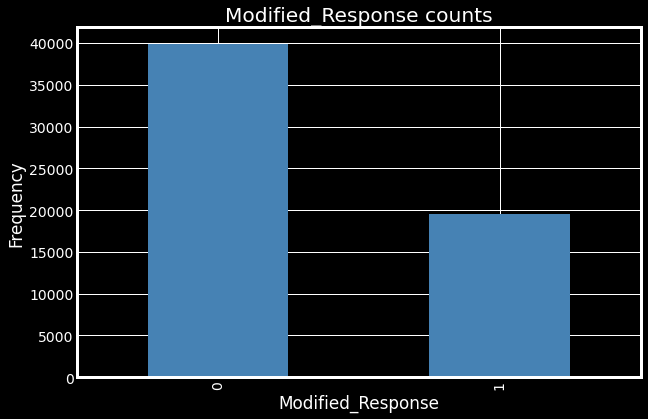

In [11]:
# Doing count plots for categorical
for col in categorical:
    counts = insurance_df[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(30, 10))
    elif len(counts) >50 :
      continue
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

> **D3 has the highest frequencies**

> Most of the features here are unbalanced.

<AxesSubplot:xlabel='Employment_Info_1'>

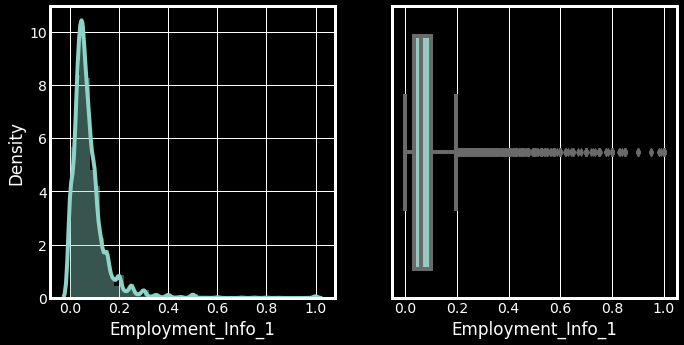

In [12]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_1'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_1'], ax=axes[1])

> Right skewed.

> Outliers can be seen.

<AxesSubplot:xlabel='Employment_Info_4'>

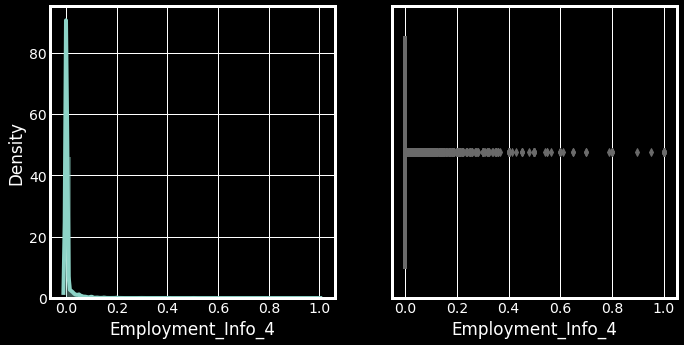

In [13]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_4'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_4'], ax=axes[1])

<AxesSubplot:xlabel='Employment_Info_6'>

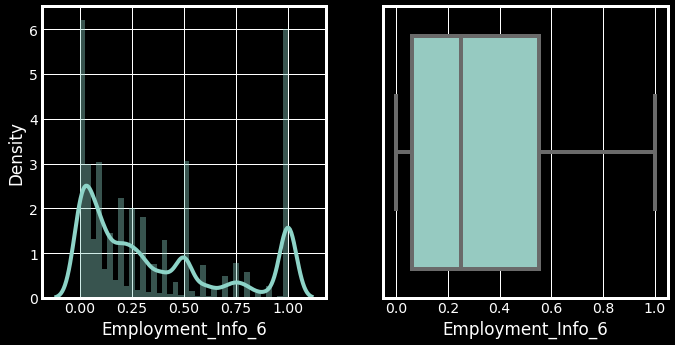

In [14]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_6'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_6'], ax=axes[1])

<AxesSubplot:xlabel='Family_Hist_4'>

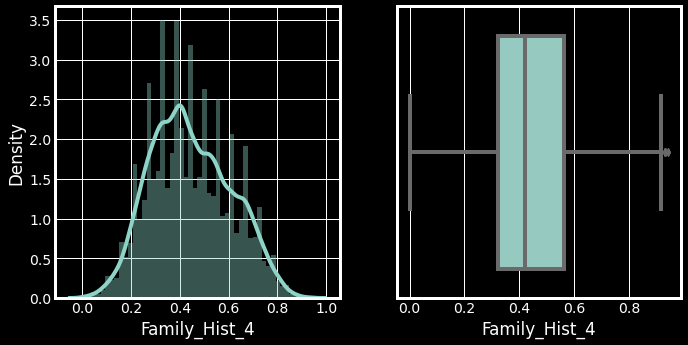

In [15]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Family_Hist_4'], ax=axes[0])
sns.boxplot(insurance_df['Family_Hist_4'], ax=axes[1])

# **Checking Correlation For Features greater than .8**

In [16]:
# I just checked correlated feature with greater than .8 here 
corr = insurance_df.corr()
corr_greater_than_80 = corr[corr>=.8]
corr_greater_than_80


Product_Info_1  Product_Info_3  Product_Info_4  \
Product_Info_1                 1.0             NaN             NaN   
Product_Info_3                 NaN             1.0             NaN   
Product_Info_4                 NaN             NaN             1.0   
Product_Info_5                 NaN             NaN             NaN   
Product_Info_6                 NaN             NaN             NaN   
...                            ...             ...             ...   
Medical_Keyword_45             NaN             NaN             NaN   
Medical_Keyword_46             NaN             NaN             NaN   
Medical_Keyword_47             NaN             NaN             NaN   
Medical_Keyword_48             NaN             NaN             NaN   
Modified_Response              NaN             NaN             NaN   

                    Product_Info_5  Product_Info_6  Product_Info_7  Ins_Age  \
Product_Info_1                 NaN             NaN             NaN      NaN   
Product_Info_3                 NaN             NaN             NaN      NaN   
Product_Info_4                 NaN             NaN             NaN      NaN   
Product_Info_5                 1.0             NaN             NaN      NaN   
Product_Info_6                 NaN             1.0             NaN      NaN   
...                            ...             ...             ...      ...   
Medical_Keyword_45             NaN             NaN             NaN      NaN   
Medical_Keyword_46             NaN             NaN             NaN      NaN   
Medical_Keyword_47             NaN             NaN             NaN      NaN   
Medical_Keyword_48             NaN             NaN             NaN      NaN   
Modified_Response              NaN             NaN             NaN      NaN   

                    Ht  Wt  BMI  ...  Medical_Keyword_40  Medical_Keyword_41  \
Product_Info_1     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_3     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_4     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_5     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_6     NaN NaN  NaN  ...                 NaN                 NaN   
...                 ..  ..  ...  ...                 ...                 ...   
Medical_Keyword_45 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_46 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_47 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_48 NaN NaN  NaN  ...                 NaN                 NaN   
Modified_Response  NaN NaN  NaN  ...                 NaN                 NaN   

                    Medical_Keyword_42  Medical_Keyword_43  \
Product_Info_1                     NaN                 NaN   
Product_Info_3                     NaN                 NaN   
Product_Info_4                     NaN                 NaN   
Product_Info_5                     NaN                 NaN   
Product_Info_6                     NaN                 NaN   
...                                ...                 ...   
Medical_Keyword_45                 NaN                 NaN   
Medical_Keyword_46                 NaN                 NaN   
Medical_Keyword_47                 NaN                 NaN   
Medical_Keyword_48                 NaN                 NaN   
Modified_Response                  NaN                 NaN   

                    Medical_Keyword_44  Medical_Keyword_45  \
Product_Info_1                     NaN                 NaN   
Product_Info_3                     NaN                 NaN   
Product_Info_4                     NaN                 NaN   
Product_Info_5                     NaN                 NaN   
Product_Info_6                     NaN                 NaN   
...                                ...                 ...   
Medical_Keyword_45                 NaN                 1.0   
Medical_Keyword_46          

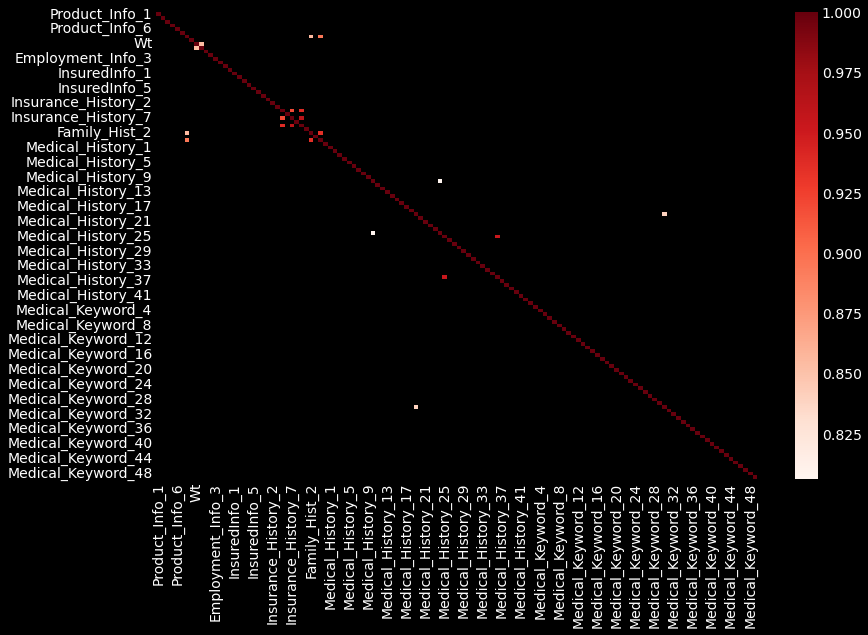

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_80, cmap="Reds");

### **CONCLUSION**

> BMI and Weight are highly correlated, which makes sense also as these 2 features are directly proprtional.

> Ins_Age and Family_Hist_4, Family_Hist_2 highly correlated

> Although, I am not going to perform any transformation on any feature or drop any as these are tree based models and they don't get affected by correlation much because of their non parametric nature.

In [18]:
#setting max columns to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# **Null Value Check**

In [19]:
#checking percentage of missing values in a column
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


# **Removing unimportant column**

In [20]:
# Dropping all columns in which greater than 40 percent null values
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)

In [21]:
# Does not contain important information
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

# **X and Y split**

In [22]:
# Data for all the independent variables
X = insurance_df.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
Y = insurance_df['Modified_Response']

# **Filling Remaining Missing Values**

In [23]:
# Filling remaining missing values with mean
X = X.fillna(X.mean())

# **Train Test Split**

In [24]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

# **Shapes of Train and Test Data**

In [25]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


# **Some Important functions that I will be using throughout**

In [26]:
# Utility Functions
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(Y_train,train_class_preds)
  test_cm = confusion_matrix(Y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(Y_train,train_preds)
  test_auc = roc_auc_score(Y_test,test_preds)

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)
  
  # Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds)
  precision = precision_score(Y_test, test_class_preds)
  recall = recall_score(Y_test, test_class_preds) 
  
  
  #R2 score on train and test data
  train_log = log_loss(Y_train,train_preds)
  test_log = log_loss(Y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log


def check_importance(model, X_train):
  #Checking importance of features
  importances = model.feature_importances_
  
  #List of columns and their importances
  importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
  #Creating a dataframe
  importance_df = pd.DataFrame(importance_dict)
  
  #Rounding it off to 2 digits as we might get exponential numbers
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  return importance_df.sort_values(by=['Feature Importance'],ascending=False)

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model



# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')
  

  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10], 
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)

# This gives feature importance
def plot_feature_importance(model, X_train):
  # PLotting features vs their importance factors
  fig = plt.figure(figsize = (15, 8))
  
  # Extracting importance values
  values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values
  
  
  # Extracting importance features
  features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

  plt.bar(features, values, color ='blue',
          width = 0.4)
  plt.xticks( rotation='vertical')
  plt.show()

# **Random Forest**


In [27]:

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

pprint(rf_parameters)

#finding the best model
rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_train, Y_train)

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}
Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.7s


[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   1.7s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   1.7s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   2.1s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   2.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   1.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   1.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=1

In [28]:
# Getting scores from all the metrices
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.8055012911193443
The accuracy on test dataset is 0.7986663074228748

Train confusion matrix:
[[27283  2624]
 [ 6038  8590]]

Test confusion matrix:
[[9095  890]
 [2099 2762]]

ROC on train data: 0.8902890044727937
ROC on test data: 0.8823741681231989

Train log loss: 0.43063692951937416
Test log loss: 0.43635123008331006

F score is: 0.6488899330435803
Precision is: 0.7562979189485214
Recall is: 0.5681958444764452


# **Feature Importance For Random Forest**

In [29]:
# Getting the feature importance for all the features
check_importance(rf_model, X_train)

Feature  Feature Importance
9                    BMI                0.25
8                     Wt                0.16
55    Medical_History_23                0.10
86    Medical_Keyword_15                0.09
38     Medical_History_4                0.08
21         InsuredInfo_6                0.05
6                Ins_Age                0.04
2         Product_Info_4                0.03
32         Family_Hist_2                0.02
74     Medical_Keyword_3                0.02
7                     Ht                0.02
34         Family_Hist_4                0.02
94    Medical_Keyword_23                0.01
35     Medical_History_1                0.01
119   Medical_Keyword_48                0.01
40     Medical_History_6                0.01
48    Medical_History_16                0.01
63    Medical_History_33                0.01
96    Medical_Keyword_25                0.01
33         Family_Hist_3                0.01
69    Medical_History_39                0.01
116   Medical_Keyword_45                0.00
114   Medical_Keyword_43                0.00
85    Medical_Keyword_14                0.00
115   Medical_Keyword_44                0.00
84    Medical_Keyword_13                0.00
83    Medical_Keyword_12                0.00
82    Medical_Keyword_11                0.00
81    Medical_Keyword_10                0.00
80     Medical_Keyword_9                0.00
79     Medical_Keyword_8                0.00
78     Medical_Keyword_7                0.00
88    Medical_Keyword_17                0.00
77     Medical_Keyword_6                0.00
76     Medical_Keyword_5                0.00
75     Medical_Keyword_4                0.00
117   Medical_Keyword_46                0.00
73     Medical_Keyword_2                0.00
72     Medical_Keyword_1                0.00
118   Medical_Keyword_47                0.00
71    Medical_History_41                0.00
70    Medical_History_40                0.00
87    Medical_Keyword_16                0.00
105   Medical_Keyword_34                0.00
106   Medical_Keyword_35                0.00
95    Medical_Keyword_24                0.00
104   Medical_Keyword_33                0.00
103   Medical_Keyword_32                0.00
102   Medical_Keyword_31                0.00
101   Medical_Keyword_30                0.00
100   Medical_Keyword_29                0.00
99    Medical_Keyword_28                0.00
98    Medical_Keyword_27                0.00
97    Medical_Keyword_26                0.00
107   Medical_Keyword_36                0.00
108   Medical_Keyword_37                0.00
90    Medical_Keyword_19                0.00
68    Medical_History_38                0.00
109   Medical_Keyword_38                0.00
110   Medical_Keyword_39                0.00
111   Medical_Keyword_40                0.00
93    Medical_Keyword_22                0.00
112   Medical_Keyword_41                0.00
92    Medical_Keyword_21                0.00
113   Medical_Keyword_42                0.00
91    Medical_Keyword_20                0.00
89    Medical_Keyword_18                0.00
0         Product_Info_1                0.00
67    Medical_History_37                0.00
66    Medical_History_36                0.00
30   Insurance_History_9                0.00
29   Insurance_History_8                0.00
28   Insurance_History_7                0.00
27   Insurance_History_5                0.00
26   Insurance_History_4                0.00
25   Insurance_History_3                0.00
24   Insurance_History_2                0.00
23   Insurance_History_1                0.00
22         InsuredInfo_7                0.00
20         InsuredInfo_5                0.00
19         InsuredInfo_4                0.00
18         InsuredInfo_3                0.00
17         InsuredInfo_2                0.00
16         InsuredInfo_1                0.00
15     Employment_Info_6                0.00
14     Employment_Info_5                0.00
13     Employment_Info_4                0.00
12     Employment_Info_3                0.00
11     Emplo

# **Plotting only those features which are contributing something**


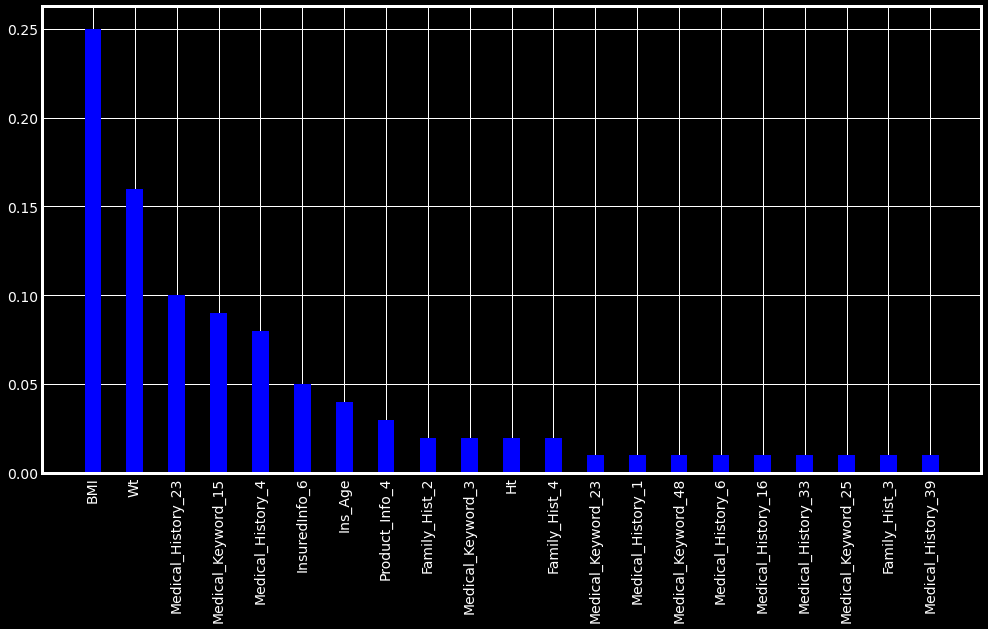

In [31]:
# PLotting only those features which are contributing something
plot_feature_importance(rf_model, X_train)

### **CONCLUSION:**

> BMI, weight, Medical_History_23, Medical_History_4 and Medical_Keyword_15 seems to be important features according to random forest.

> Also, only these features are contributing to the model prediction. Some features can be elmininated which are not contributing on further investigation.

## **Model Interpretability For Random Forest**






### **Using Lime**

In [32]:

# Interpretting the model using lime
interpret_with_lime(rf_model,X_test)

### **Using Shap**

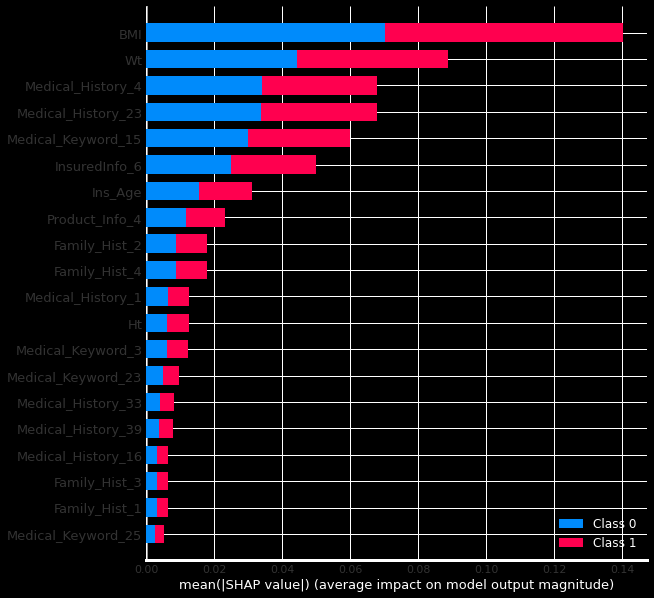

In [33]:

# Interpretting the model using shaply
X_shap=X_train

rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_shap)
shap.summary_plot(rf_shap_values, X_shap, plot_type="bar")

#### **Findings**

> Medical keyword 15,medical history 9,  Wt, medical history 3 all pushing towards 1.

> Orange ones are pusing towards 1.

## **Dependence Plots**

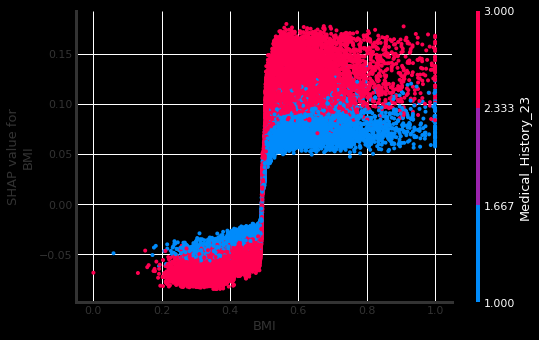

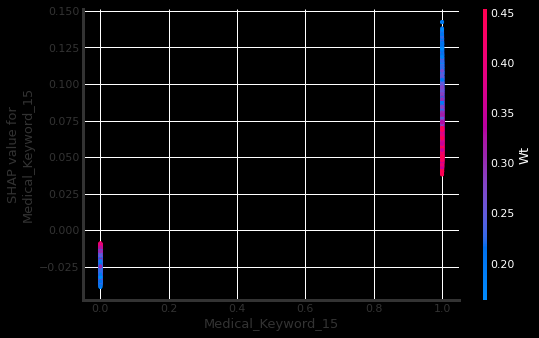

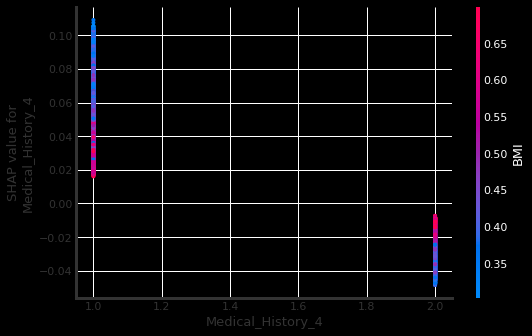

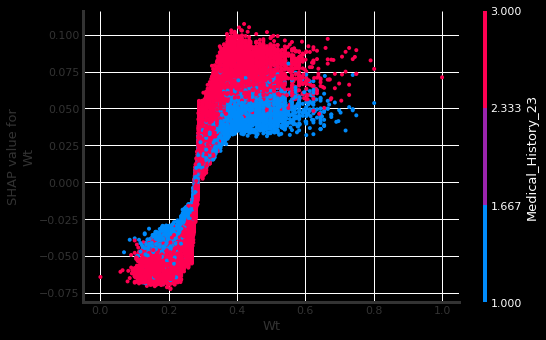

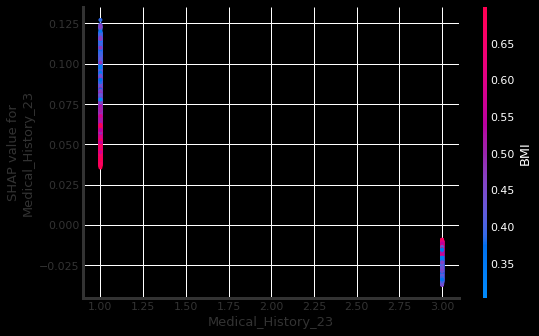

In [34]:
# Plotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Wt','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, rf_shap_values[0], X_train)

### **Findings**

> With high medical history 23 and low bmi we get class 1

# **Gradient Boosting**




In [35]:
#finding the best model
gb_parameters ={
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1]
}

pprint(gb_parameters)

gb_optimal_model = grid_search(GradientBoostingClassifier(), gb_parameters, X_train, Y_train)

{'learning_rate': [0.01, 0.1, 1],
 'max_depth': [1, 3, 5, 7],
 'n_estimators': [5, 50, 250]}
Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.2s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=250; total time=   5.2s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=250; total time=   5.2s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.4s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.4s
[CV] END ..learning_rate=0.01, max_d

# **Feature Importance For Gradient Boosting**

In [36]:
# Getting the scpres for all the score metrics used here
gb_model, gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_f1, gb_precision,gb_recall,gb_train_log, gb_test_log = check_scores(gb_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.8644886044683956
The accuracy on test dataset is 0.8334905024922538

Train confusion matrix:
[[26630  3277]
 [ 2758 11870]]

Test confusion matrix:
[[8724 1261]
 [1211 3650]]

ROC on train data: 0.9378223036029318
ROC on test data: 0.9090652848229348

Train log loss: 0.3033252862180813
Test log loss: 0.35415081533682885

F score is: 0.747032337290217
Precision is: 0.7432294848299735
Recall is: 0.750874305698416


In [37]:
# Getting feature importance
check_importance(gb_model, X_train)

Feature  Feature Importance
9                    BMI                0.39
55    Medical_History_23                0.14
38     Medical_History_4                0.13
2         Product_Info_4                0.05
86    Medical_Keyword_15                0.03
6                Ins_Age                0.03
8                     Wt                0.03
74     Medical_Keyword_3                0.02
34         Family_Hist_4                0.01
33         Family_Hist_3                0.01
21         InsuredInfo_6                0.01
31         Family_Hist_1                0.01
32         Family_Hist_2                0.01
15     Employment_Info_6                0.01
61    Medical_History_30                0.01
10     Employment_Info_1                0.01
35     Medical_History_1                0.01
36     Medical_History_2                0.01
90    Medical_Keyword_19                0.00
84    Medical_Keyword_13                0.00
89    Medical_Keyword_18                0.00
88    Medical_Keyword_17                0.00
87    Medical_Keyword_16                0.00
91    Medical_Keyword_20                0.00
85    Medical_Keyword_14                0.00
80     Medical_Keyword_9                0.00
83    Medical_Keyword_12                0.00
82    Medical_Keyword_11                0.00
81    Medical_Keyword_10                0.00
93    Medical_Keyword_22                0.00
79     Medical_Keyword_8                0.00
78     Medical_Keyword_7                0.00
77     Medical_Keyword_6                0.00
76     Medical_Keyword_5                0.00
75     Medical_Keyword_4                0.00
73     Medical_Keyword_2                0.00
72     Medical_Keyword_1                0.00
71    Medical_History_41                0.00
70    Medical_History_40                0.00
92    Medical_Keyword_21                0.00
0         Product_Info_1                0.00
94    Medical_Keyword_23                0.00
107   Medical_Keyword_36                0.00
118   Medical_Keyword_47                0.00
117   Medical_Keyword_46                0.00
116   Medical_Keyword_45                0.00
115   Medical_Keyword_44                0.00
114   Medical_Keyword_43                0.00
113   Medical_Keyword_42                0.00
112   Medical_Keyword_41                0.00
111   Medical_Keyword_40                0.00
110   Medical_Keyword_39                0.00
109   Medical_Keyword_38                0.00
108   Medical_Keyword_37                0.00
106   Medical_Keyword_35                0.00
95    Medical_Keyword_24                0.00
105   Medical_Keyword_34                0.00
104   Medical_Keyword_33                0.00
103   Medical_Keyword_32                0.00
102   Medical_Keyword_31                0.00
101   Medical_Keyword_30                0.00
100   Medical_Keyword_29                0.00
99    Medical_Keyword_28                0.00
98    Medical_Keyword_27                0.00
97    Medical_Keyword_26                0.00
68    Medical_History_38                0.00
96    Medical_Keyword_25                0.00
69    Medical_History_39                0.00
60    Medical_History_29                0.00
67    Medical_History_37                0.00
19         InsuredInfo_4                0.00
30   Insurance_History_9                0.00
29   Insurance_History_8                0.00
28   Insurance_History_7                0.00
27   Insurance_History_5                0.00
26   Insurance_History_4                0.00
25   Insurance_History_3                0.00
24   Insurance_History_2                0.00
23   Insurance_History_1                0.00
22         InsuredInfo_7                0.00
20         InsuredInfo_5                0.00
18         InsuredInfo_3                0.00
39     Medical_History_5                0.00
17         InsuredInfo_2                0.00
16         InsuredInfo_1                0.00
14     Employment_Info_5                0.00
13     Employment_Info_4                0.00
12     Employment_Info_3                0.00
11     Emplo

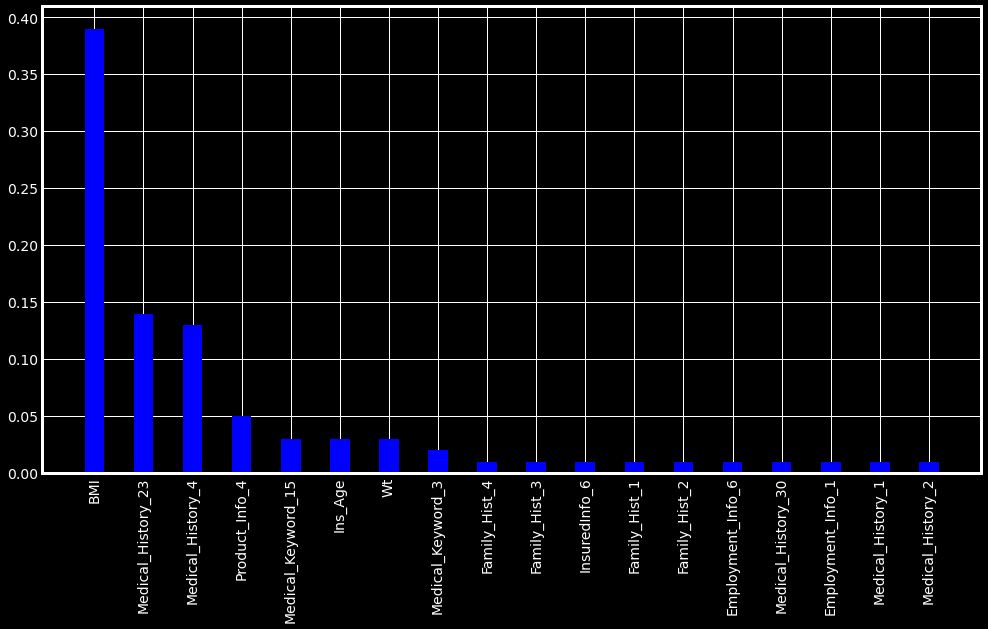

In [38]:
# PLotting only those features which are contributing something
plot_feature_importance(gb_model, X_train)

#### **CONCLUSION:**

> BMI, weight, Medical_History_23, Medical_History_4 and Medical_Keyword_15 seems to be the most important 5 features according to Gradient boosting.


# **Model Interpretability For Gradient Boosting**

### **Using Lime**

In [39]:
# Interpretting the model using lime
interpret_with_lime(gb_model,X_test)

### **Using Shap**

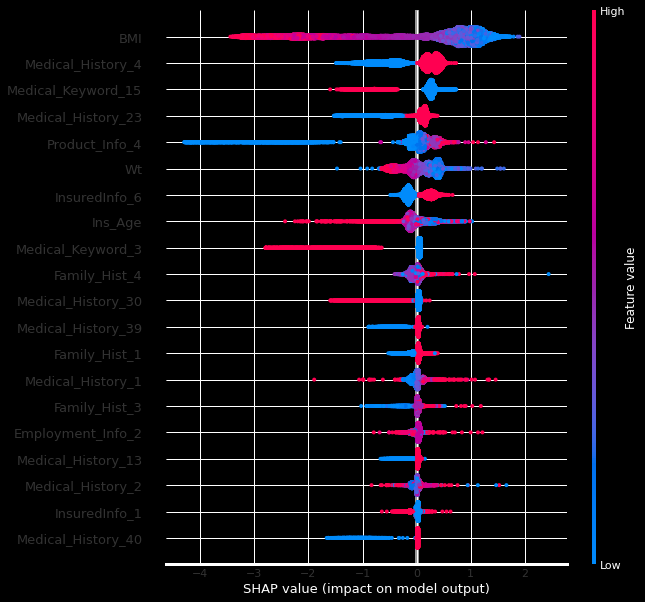

In [40]:

# Interpretting the model using shaply
X_shap=X_train

gb_explainer = shap.TreeExplainer(gb_model)
gb_shap_values = gb_explainer.shap_values(X_shap)
shap.summary_plot(gb_shap_values, X_shap, plot_type="dot")

#### **Findings**
> BMI is pushing models prediction towards 0.

>Medical keyword 15 is pushing towards 1. However, medical keyword 4 is pushing towards 0.

> Also, according to feature plot Wt. was in top 5 most important features, same isn't followed here.

## **Dependence Plots**

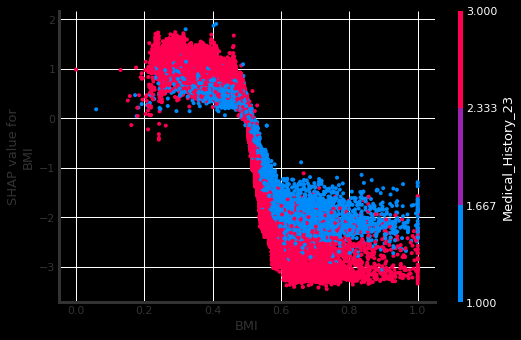

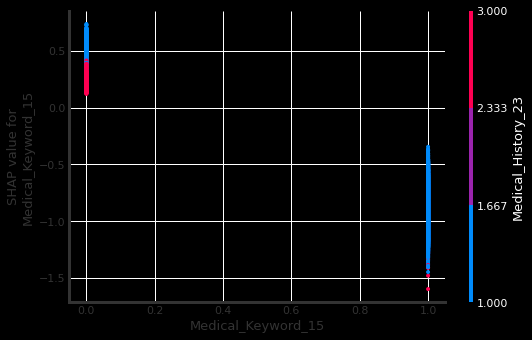

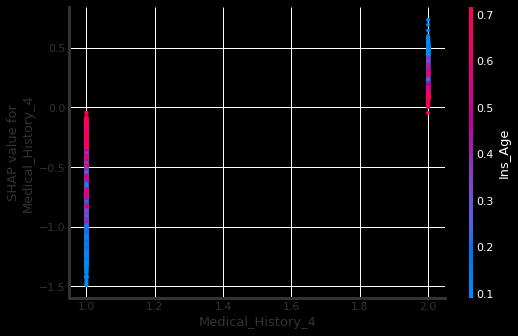

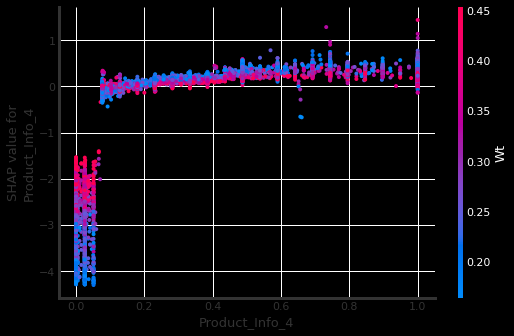

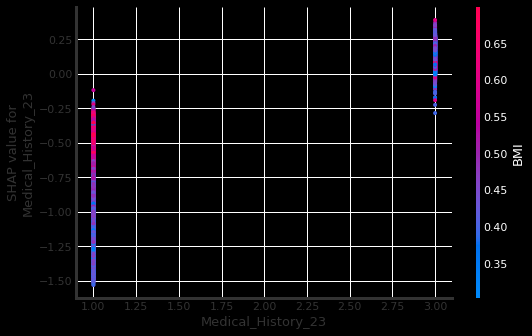

In [41]:
#PLotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Product_Info_4','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, gb_shap_values, X_train)

### **Findings**

> For low BMI and high medical history 23 we get class as 1.



# **XGBOOST**

In [42]:
# Parameter grid for xgboost
xgb_parameters = {'max_depth': [1,3,5], 'n_estimators': [2,5,10], 'learning_rate': [.01 , .1, .5]}
print('XGB parameters areL:')
pprint(xgb_parameters)
#finding the best model
xgb_optimal_model = grid_search(XGBClassifier(), xgb_parameters, X_train, Y_train)




XGB parameters areL:
{'learning_rate': [0.01, 0.1, 0.5],
 'max_depth': [1, 3, 5],
 'n_estimators': [2, 5, 10]}
Fitting 2 folds for each of 27 candidates, totalling 54 fits
[11:35:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=2; total time=   0.1s
[11:35:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=2; total time=   0.1s
[11:35:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'e

[CV] END .....learning_rate=0.1, max_depth=3, n_estimators=2; total time=   0.1s
[11:35:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....learning_rate=0.1, max_depth=3, n_estimators=5; total time=   0.1s
[11:35:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....learning_rate=0.1, max_depth=3, n_estimators=5; total time=   0.1s
[11:35:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[

[CV] END .....learning_rate=0.5, max_depth=5, n_estimators=5; total time=   0.2s
[11:35:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....learning_rate=0.5, max_depth=5, n_estimators=5; total time=   0.2s
[11:35:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....learning_rate=0.5, max_depth=5, n_estimators=10; total time=   0.4s
[11:35:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[

In [43]:
# Getting the scores for all the score metrics used here
xgb_model, xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_f1, xgb_precision,xgb_recall,xgb_train_log, xgb_test_log= check_scores(xgb_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.830672504771528
The accuracy on test dataset is 0.825272800754412

Train confusion matrix:
[[25730  4177]
 [ 3364 11264]]

Test confusion matrix:
[[8566 1419]
 [1175 3686]]

ROC on train data: 0.9070705299819286
ROC on test data: 0.9015875283816488

Train log loss: 0.3602193490127893
Test log loss: 0.36868035877731037

F score is: 0.7397150311057596
Precision is: 0.7220372184133202
Recall is: 0.7582801892614688


# **Feature Importance For XGBoost**

In [44]:
# Getting feature importance

check_importance(xgb_model, X_train)

Feature  Feature Importance
55    Medical_History_23                0.19
9                    BMI                0.15
38     Medical_History_4                0.13
74     Medical_Keyword_3                0.06
86    Medical_Keyword_15                0.05
61    Medical_History_30                0.05
46    Medical_History_13                0.04
22         InsuredInfo_7                0.04
21         InsuredInfo_6                0.03
112   Medical_Keyword_41                0.03
2         Product_Info_4                0.03
39     Medical_History_5                0.02
94    Medical_Keyword_23                0.02
31         Family_Hist_1                0.02
52    Medical_History_20                0.01
59    Medical_History_28                0.01
37     Medical_History_3                0.01
69    Medical_History_39                0.01
33         Family_Hist_3                0.01
24   Insurance_History_2                0.01
0         Product_Info_1                0.01
70    Medical_History_40                0.01
20         InsuredInfo_5                0.01
6                Ins_Age                0.01
106   Medical_Keyword_35                0.01
17         InsuredInfo_2                0.01
78     Medical_Keyword_7                0.00
85    Medical_Keyword_14                0.00
84    Medical_Keyword_13                0.00
83    Medical_Keyword_12                0.00
115   Medical_Keyword_44                0.00
82    Medical_Keyword_11                0.00
81    Medical_Keyword_10                0.00
80     Medical_Keyword_9                0.00
79     Medical_Keyword_8                0.00
116   Medical_Keyword_45                0.00
87    Medical_Keyword_16                0.00
77     Medical_Keyword_6                0.00
117   Medical_Keyword_46                0.00
76     Medical_Keyword_5                0.00
75     Medical_Keyword_4                0.00
118   Medical_Keyword_47                0.00
73     Medical_Keyword_2                0.00
72     Medical_Keyword_1                0.00
71    Medical_History_41                0.00
114   Medical_Keyword_43                0.00
88    Medical_Keyword_17                0.00
113   Medical_Keyword_42                0.00
104   Medical_Keyword_33                0.00
105   Medical_Keyword_34                0.00
103   Medical_Keyword_32                0.00
102   Medical_Keyword_31                0.00
101   Medical_Keyword_30                0.00
100   Medical_Keyword_29                0.00
99    Medical_Keyword_28                0.00
98    Medical_Keyword_27                0.00
97    Medical_Keyword_26                0.00
107   Medical_Keyword_36                0.00
95    Medical_Keyword_24                0.00
108   Medical_Keyword_37                0.00
109   Medical_Keyword_38                0.00
110   Medical_Keyword_39                0.00
111   Medical_Keyword_40                0.00
93    Medical_Keyword_22                0.00
92    Medical_Keyword_21                0.00
91    Medical_Keyword_20                0.00
90    Medical_Keyword_19                0.00
89    Medical_Keyword_18                0.00
96    Medical_Keyword_25                0.00
60    Medical_History_29                0.00
68    Medical_History_38                0.00
16         InsuredInfo_1                0.00
32         Family_Hist_2                0.00
30   Insurance_History_9                0.00
29   Insurance_History_8                0.00
28   Insurance_History_7                0.00
27   Insurance_History_5                0.00
26   Insurance_History_4                0.00
25   Insurance_History_3                0.00
23   Insurance_History_1                0.00
19         InsuredInfo_4                0.00
18         InsuredInfo_3                0.00
15     Employment_Info_6                0.00
67    Medical_History_37                0.00
14     Employment_Info_5                0.00
13     Employment_Info_4                0.00
12     Employment_Info_3                0.00
11     Employment_Info_2                0.00
10     Emplo

### **Conclusion:**

> Same trend is seen here.

> They all are giving similar scores also so it could be that same features are contributing the most thus similar scores.


# **Model Interpretability for XGBoost**

## **Using Shap**

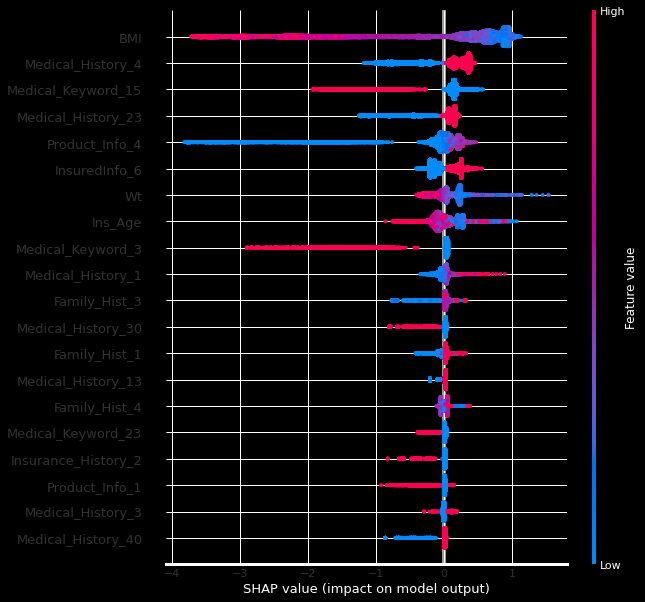

In [45]:

# Interpretting the model using shaply

xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_shap)
shap.summary_plot(xgb_shap_values, X_shap, plot_type="dot")

> Again BMI is pushing towards class 0.

> MEdical history 4 pushing towards class 1.

## **Dependence Plots**

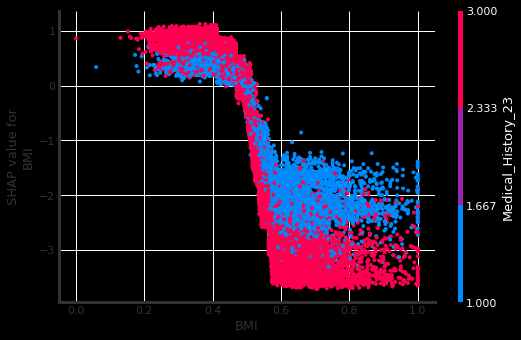

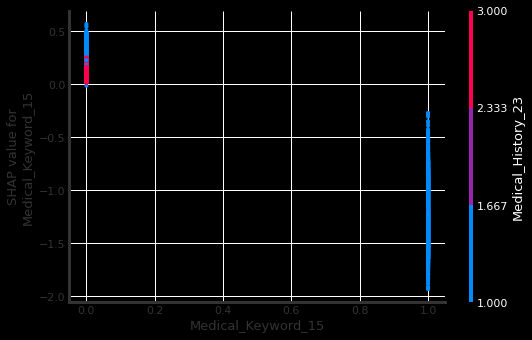

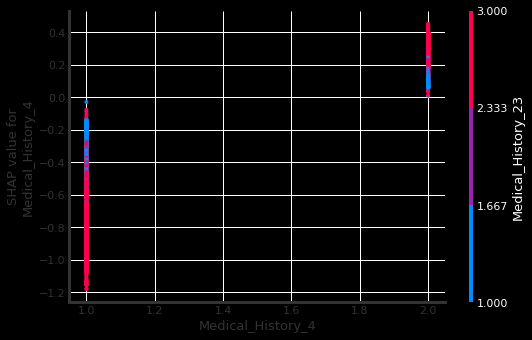

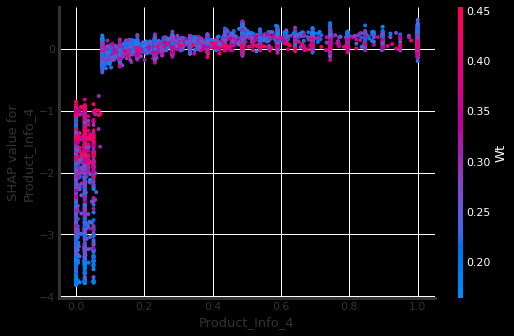

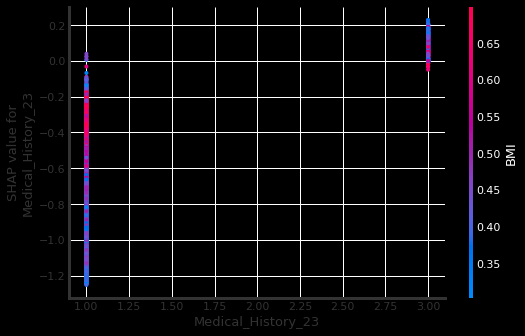

In [46]:
#PLotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Product_Info_4','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, xgb_shap_values, X_train)

> For product info 4 and wt we see some interesting trend

# **Logistic Regression**

In [47]:

# Parameter grid for Logistic Regression
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_parameters = dict(solver=solvers,penalty=penalty,C=c_values)# define grid search

#finding the best model
lr_optimal_model = grid_search(LogisticRegression( max_iter=5000), lr_parameters, X_train, Y_train)



Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=  12.2s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=  12.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  15.2s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  10.4s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=  14.1s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=  16.1s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  11.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  10.5s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   5.3s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   4.3s


Best parameters are: 
{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [48]:
# Getting the scores for all the score metrics used here

lr_model, lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_f1, lr_precision, lr_recall,lr_train_log, lr_test_log = check_scores(lr_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.8129561019422926
The accuracy on test dataset is 0.8101172032870807

Train confusion matrix:
[[26104  3803]
 [ 4527 10101]]

Test confusion matrix:
[[8725 1260]
 [1559 3302]]

ROC on train data: 0.8852400832883643
ROC on test data: 0.8812096564925562

Train log loss: 0.39576883391672685
Test log loss: 0.4011007531650261

F score is: 0.7008383741908097
Precision is: 0.7238053485313459
Recall is: 0.6792840979222382


# **Feature Importance For Logistic Regression**

In [49]:
# Making a dataframe with coefficients and the feature names respectively
importance_df_lr = pd.concat([ pd.DataFrame(data =((X_train.columns).values).reshape(-1,1), columns = ['Feature']), pd.DataFrame(data =np.round(lr_optimal_model.coef_,2).reshape(-1,1), columns = ['Feature Importance'])], axis=1 )
importance_df_lr.sort_values(by=['Feature Importance'],ascending=False, inplace = True)
importance_df_lr

Feature  Feature Importance
112   Medical_Keyword_41                1.75
7                     Ht                1.50
38     Medical_History_4                1.24
33         Family_Hist_3                1.23
52    Medical_History_20                1.19
2         Product_Info_4                0.85
70    Medical_History_40                0.81
83    Medical_Keyword_12                0.74
114   Medical_Keyword_43                0.74
77     Medical_Keyword_6                0.60
116   Medical_Keyword_45                0.59
49    Medical_History_17                0.58
44    Medical_History_11                0.54
100   Medical_Keyword_29                0.48
62    Medical_History_31                0.48
34         Family_Hist_4                0.42
55    Medical_History_23                0.38
32         Family_Hist_2                0.35
41     Medical_History_7                0.34
21         InsuredInfo_6                0.34
69    Medical_History_39                0.31
97    Medical_Keyword_26                0.31
93    Medical_Keyword_22                0.31
101   Medical_Keyword_30                0.30
47    Medical_History_14                0.28
91    Medical_Keyword_20                0.26
37     Medical_History_3                0.25
58    Medical_History_27                0.24
115   Medical_Keyword_44                0.22
81    Medical_Keyword_10                0.22
31         Family_Hist_1                0.21
96    Medical_Keyword_25                0.20
110   Medical_Keyword_39                0.19
25   Insurance_History_3                0.18
78     Medical_Keyword_7                0.18
54    Medical_History_22                0.16
98    Medical_Keyword_27                0.16
46    Medical_History_13                0.15
103   Medical_Keyword_32                0.13
19         InsuredInfo_4                0.13
5         Product_Info_7                0.13
14     Employment_Info_5                0.12
76     Medical_Keyword_5                0.12
87    Medical_Keyword_16                0.12
105   Medical_Keyword_34                0.10
104   Medical_Keyword_33                0.10
60    Medical_History_29                0.10
28   Insurance_History_7                0.10
15     Employment_Info_6                0.08
73     Medical_Keyword_2                0.08
26   Insurance_History_4                0.08
79     Medical_Keyword_8                0.07
29   Insurance_History_8                0.07
108   Medical_Keyword_37                0.07
85    Medical_Keyword_14                0.07
71    Medical_History_41                0.06
63    Medical_History_33                0.06
92    Medical_Keyword_21                0.06
10     Employment_Info_1                0.05
90    Medical_Keyword_19                0.04
107   Medical_Keyword_36                0.03
64    Medical_History_34                0.02
118   Medical_Keyword_47                0.02
53    Medical_History_21                0.01
36     Medical_History_2                0.00
1         Product_Info_3               -0.00
35     Medical_History_1                0.00
11     Employment_Info_2               -0.00
18         InsuredInfo_3               -0.00
30   Insurance_History_9               -0.00
82    Medical_Keyword_11               -0.01
40     Medical_History_6               -0.01
48    Medical_History_16               -0.01
99    Medical_Keyword_28               -0.01
88    Medical_Keyword_17               -0.03
66    Medical_History_36               -0.03
27   Insurance_History_5               -0.03
67    Medical_History_37               -0.04
89    Medical_Keyword_18               -0.05
4         Product_Info_6               -0.06
72     Medical_Keyword_1               -0.07
43     Medical_History_9               -0.07
12     Employment_Info_3               -0.08
42     Medical_History_8               -0.10
95    Medical_Keyword_24               -0.10
13     Employment_Info_4               -0.11
59    Medical_History_28               -0.11
113   Medical_Keyword_42               -0.14
45    Medica

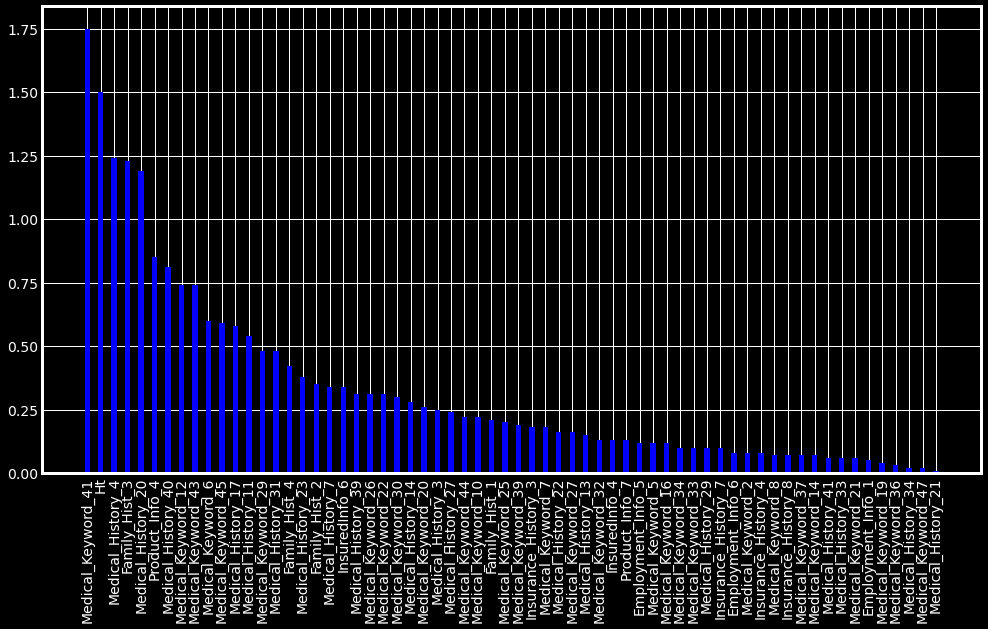

In [50]:
# Plotting feature vs importance
fig = plt.figure(figsize = (15, 8))

values =importance_df_lr[importance_df_lr['Feature Importance']>0]['Feature Importance'].values

features = importance_df_lr[importance_df_lr['Feature Importance']>0]['Feature'].values

plt.bar(features, values, color ='blue',
          width = 0.4)
plt.xticks( rotation='vertical')
plt.show()

#### **Conclusion**

> **And again the same pattern when doing feature importance**

# **Model Interpretability for logistic regression**

## **Using Lime**

In [51]:

# Interpretting the model using lime
interpret_with_lime(lr_model,X_test)

### **Findings**

> Only BMI and medical history 4 pushing towards class 0

# **Max Voting Model**

In [52]:
# Appending all the models to estimators list
estimators = []

estimators.append(('logistic', lr_optimal_model))
estimators.append(('XGB', xgb_optimal_model))
estimators.append(('GB', gb_optimal_model))
estimators.append(('rf', rf_optimal_model))

# create the voting model
voting_model = VotingClassifier(estimators, voting='soft')

voting_model.fit(X_train, Y_train)

# Save the model in a pkl file
joblib.dump(voting_model, 'voting_model.pkl')


[11:39:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


['voting_model.pkl']

In [53]:
# Getting all the scores and errors
voting_model, voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_f1, voting_precision, voting_recall, voting_train_log, voting_test_log = check_scores(voting_model, X_train, X_test )

The accuracy on train dataset is 0.8392724823172786
The accuracy on test dataset is 0.8282365620369123

Train confusion matrix:
[[26518  3389]
 [ 3769 10859]]

Test confusion matrix:
[[8823 1162]
 [1388 3473]]

ROC on train data: 0.9178941410561237
ROC on test data: 0.9045972167467413

Train log loss: 0.35919728841298715
Test log loss: 0.37572435859453723

F score is: 0.7314658803706824
Precision is: 0.7492988133764833
Recall is: 0.7144620448467394


# **Stacked Model**

In [54]:
#Building a stacked classifier
stacked_classifier = StackingClassifier(classifiers =[lr_optimal_model, xgb_optimal_model, gb_model], meta_classifier = RandomForestClassifier(), use_probas = True, use_features_in_secondary = True)

# training of stacked model
stacked_model = stacked_classifier.fit(X_train, Y_train)
joblib.dump(stacked_model, 'stacked_model.pkl')



[11:40:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


['stacked_model.pkl']

In [55]:
stacked_model, stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_f1, stacked_precision, stacked_recall, stacked_train_log, stacked_test_log = check_scores(stacked_model, X_train, X_test )

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.830930890475549

Train confusion matrix:
[[29907     0]
 [    0 14628]]

Test confusion matrix:
[[8732 1253]
 [1257 3604]]

ROC on train data: 1.0
ROC on test data: 0.9051426965587241

Train log loss: 0.07586486305577014
Test log loss: 0.4064494063680269

F score is: 0.7417164025519654
Precision is: 0.7420218241712991
Recall is: 0.7414112322567373


# **Models And Their Accuracies**

In [56]:
# Making a dataframe of all the scores for every model

scores_ = [("Random Forest", rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_train_log, rf_test_log,rf_f1, rf_precision, rf_recall),
("Gradient Boosting",  gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_train_log, gb_test_log,gb_f1, gb_precision,gb_recall,),
("XG Boost", xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_train_log, xgb_test_log,xgb_f1, xgb_precision, xgb_recall),
("Logistic Regression", lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_train_log, lr_test_log,lr_f1, lr_precision, lr_recall,),
("Voting Classifier", voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_train_log, voting_test_log, voting_f1, voting_precision, voting_recall),
("Stacked Model", stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_train_log, stacked_test_log, stacked_f1, stacked_precision, stacked_recall)]

Scores_ =pd.DataFrame(data = scores_, columns=['Model Name', 'Train ROC', 'Test ROC', 'Train Accuracy', 'Test Accuracy', 'Train Log Loss','Test Log Loss','F-Score', 'Precision','Recall',])
Scores_.set_index('Model Name', inplace = True)

Scores_


Train ROC  Test ROC  Train Accuracy  Test Accuracy  \
Model Name                                                                
Random Forest         0.890289  0.882374        0.805501       0.798666   
Gradient Boosting     0.937822  0.909065        0.864489       0.833491   
XG Boost              0.907071  0.901588        0.830673       0.825273   
Logistic Regression   0.885240  0.881210        0.812956       0.810117   
Voting Classifier     0.917894  0.904597        0.839272       0.828237   
Stacked Model         1.000000  0.905143        1.000000       0.830931   

                     Train Log Loss  Test Log Loss   F-Score  Precision  \
Model Name                                                                
Random Forest              0.430637       0.436351  0.648890   0.756298   
Gradient Boosting          0.303325       0.354151  0.747032   0.743229   
XG Boost                   0.360219       0.368680  0.739715   0.722037   
Logistic Regression        0.395769       0.401101  0.700838   0.723805   
Voting Classifier          0.359197       0.375724  0.731466   0.749299   
Stacked Model              0.075865       0.406449  0.741716   0.742022   

                       Recall  
Model Name                     
Random Forest        0.568196  
Gradient Boosting    0.750874  
XG Boost             0.758280  
Logistic Regression  0.679284  
Voting Classifier    0.714462  
Stacked Model        0.741411

# **Final Results**

> **Gradient Boosting, Voting Classifier and Stacked models are performing really well. Their train and test errors and also the roc scores and f scores are really close and good.**